# Assignment #4 - Neural Networks

### <font color="red"> DUE: Nov 16 (Thursday) 11:00 pm </font>  

<font color="blue"> Soham Devdatta Dhodapkar </font>

# I. Overview

The primary objective of this assignment is practicing and implementing non-linear regression algorithm mainly using concepts of neural networks.<br>
We will apply our regression dataset on this neural network model. 
We'll use 5 Fold cross-validationon the model for network selection and choosing parameters.<br>
There is also some extra-credit for performing logistic regression on classification data using neural networks. We are going to use NeuralNet class and perform cross-validation again to evaluate our ML model.
Also further down the assignment, we have to implement deep learning paradigm using Tensorflow libraries

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

The dataset used in this assignment is NYSE(New York Stock Exchange) data, downloaded from Kaggle datasets.
Here is the link : https://www.kaggle.com/dgawlik/nyse <br>
raw, as-is daily prices. Most of data spans from 2010 to the end 2016, for companies new on stock market date range is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that. <br>

The primary motive behind choosing this dataset is the capability of application of machine learning to the banking, stocks and investment industry. Careful study and modelling of this data can give very deep insights into the data obtained and examine the events based on the observations. <br>

This data set has 851,264 rows and 6 columns. Fortunately enough, all the columns are of great use while modelling the data for a stock exchange.
The six columns are <B>Symbol,Open,Close,Low,High.Volume</B>
The models applied on this data can be easily scaled according to the data needs.
Open indicates the opening value of a stock.<br>
Close indicates the closing price of the stock for the day.<br>
Low indicates the lower spectrum of the stock value.<br>
High indicates the higher spectrum of the stock value.<br>
Volume indicates the number of stocks.

###### We are setting up the auto-complete feature of the jupyter notebook for the purpose ease of coding.

In [1]:
%config IPCompleter.greedy=True

###### Importing all the necessary libraries.
###### We are using NeuralNet class for using it for Non-Linear Regression model building.

In [2]:
from nn import NeuralNet
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

###### Reading the data from the file..

In [3]:
df = pd.read_csv("prices.csv")
df

date symbol        open       close         low  \
0       2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998   
1       2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002   
2       2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000   
3       2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000   
4       2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996   
5       2016-01-12 00:00:00   WLTW  115.510002  115.550003  114.500000   
6       2016-01-13 00:00:00   WLTW  116.459999  112.849998  112.589996   
7       2016-01-14 00:00:00   WLTW  113.510002  114.379997  110.050003   
8       2016-01-15 00:00:00   WLTW  113.330002  112.529999  111.919998   
9       2016-01-19 00:00:00   WLTW  113.660004  110.379997  109.870003   
10      2016-01-20 00:00:00   WLTW  109.059998  109.300003  108.320000   
11      2016-01-21 00:00:00   WLTW  109.730003  110.000000  108.320000   
12      2016-01-22 00:00:00   WLTW  111.879997  111.949997  110.190002   
13      2016-01-25 00:00:00   WLTW  111.320000  110.120003  110.000000   
14      2016-01-26 00:00:00   WLTW  110.419998  111.000000  107.300003   
15      2016-01-27 00:00:00   WLTW  110.769997  110.709999  109.019997   
16      2016-01-28 00:00:00   WLTW  110.900002  112.580002  109.900002   
17      2016-01-29 00:00:00   WLTW  113.349998  114.470001  111.669998   
18      2016-02-01 00:00:00   WLTW  114.000000  114.500000  112.900002   
19      2016-02-02 00:00:00   WLTW  113.250000  110.559998  109.750000   
20      2016-02-03 00:00:00   WLTW  113.379997  114.050003  109.639999   
21      2016-02-04 00:00:00   WLTW  114.080002  115.709999  114.080002   
22      2016-02-05 00:00:00   WLTW  115.120003  114.019997  109.709999   
23      2016-02-08 00:00:00   WLTW  113.300003  111.160004  110.459999   
24      2016-02-09 00:00:00   WLTW  111.169998  110.650002  109.639999   
25      2016-02-10 00:00:00   WLTW  106.730003  107.519997  106.360001   
26      2016-02-11 00:00:00   WLTW  105.629997  107.129997  104.110001   
27      2016-02-12 00:00:00   WLTW  108.559998  107.839996  107.070000   
28      2016-02-16 00:00:00   WLTW  109.110001  110.769997  107.010002   
29      2016-02-17 00:00:00   WLTW  110.830002  111.239998  107.970001   
...                     ...    ...         ...         ...         ...   
851234           2016-12-30    WAT  135.240005  134.389999  133.710007   
851235           2016-12-30    WBA   83.459999   82.760002   82.419998   
851236           2016-12-30    WDC   68.550003   67.949997   67.610001   
851237           2016-12-30    WEC   58.980000   58.650002   58.419998   
851238           2016-12-30    WFC   54.889999   55.110001   54.790001   
851239           2016-12-30    WFM   31.059999   30.760000   30.670000   
851240           2016-12-30    WHR  183.800003  181.770004  180.869995   
851241           2016-12-30     WM   71.269997   70.910004   70.750000   
851242           2016-12-30    WMB   30.940001   31.139999   30.889999   
851243           2016-12-30    WMT   69.120003   69.120003   68.830002   
851244           2016-12-30    WRK   51.840000   50.770000   50.529999   
851245           2016-12-30     WU   21.840000   21.719999   21.600000   
851246           2016-12-30     WY   30.450001   30.090000   29.950001   
851247           2016-12-30    WYN   76.849998   76.370003   76.180000   
851248           2016-12-30   WYNN   87.099998   86.510002   85.570000   
851249           2016-12-30    XEC  136.520004  135.899994  135.309998   
851250           2016-12-30    XEL   41.000000   40.700001   40.560001   
851251           2016-12-30     XL   37.360001   37.259998   37.060001   
851252           2016-12-30   XLNX   61.090000   60.369999   60.020000   
851253           2016-12-30    XOM   90.029999   90.260002   90.010002   
851254           2016-12-30   XRAY   58.290001   57.730000   57.540001   
851255           2016-12-30    XRX    8.720000    8.730000    8.700000   
851256           2016-12-30

###### Checking if any of the data values are null...

In [4]:
df.isnull()

date  symbol   open  close    low   high  volume
0       False   False  False  False  False  False   False
1       False   False  False  False  False  False   False
2       False   False  False  False  False  False   False
3       False   False  False  False  False  False   False
4       False   False  False  False  False  False   False
5       False   False  False  False  False  False   False
6       False   False  False  False  False  False   False
7       False   False  False  False  False  False   False
8       False   False  False  False  False  False   False
9       False   False  False  False  False  False   False
10      False   False  False  False  False  False   False
11      False   False  False  False  False  False   False
12      False   False  False  False  False  False   False
13      False   False  False  False  False  False   False
14      False   False  False  False  False  False   False
15      False   False  False  False  False  False   False
16      False   False  False  False  False  False   False
17      False   False  False  False  False  False   False
18      False   False  False  False  False  False   False
19      False   False  False  False  False  False   False
20      False   False  False  False  False  False   False
21      False   False  False  False  False  False   False
22      False   False  False  False  False  False   False
23      False   False  False  False  False  False   False
24      False   False  False  False  False  False   False
25      False   False  False  False  False  False   False
26      False   False  False  False  False  False   False
27      False   False  False  False  False  False   False
28      False   False  False  False  False  False   False
29      False   False  False  False  False  False   False
...       ...     ...    ...    ...    ...    ...     ...
851234  False   False  False  False  False  False   False
851235  False   False  False  False  False  False   False
851236  False   False  False  False  False  False   False
851237  False   False  False  False  False  False   False
851238  False   False  False  False  False  False   False
851239  False   False  False  False  False  False   False
851240  False   False  False  False  False  False   False
851241  False   False  False  False  False  False   False
851242  False   False  False  False  False  False   False
851243  False   False  False  False  False  False   False
851244  False   False  False  False  False  False   False
851245  False   False  False  False  False  False   False
851246  False   False  False  False  False  False   False
851247  False   False  False  False  False  False   False
851248  False   False  False  False  False  False   False
851249  False   False  False  False  False  False   False
851250  False   False  False  False  False  False   False
851251  False   False  False  False  False  False   False
851252  False   False  False  False  False  False   False
851253  False   False  False  False  False  False   False
851254  False   False  False  False  False  False   False
851255  False   False  False  False  False  False   False
851256  False   False  False  False  False  False   False
851257  False   False  False  False  False  False   False
851258  False   False  False  False  False  False   False
851259  False   False  False  False  False  False   False
851260  False   False  False  False  False  False   False
851261  False   False  False  False  False  False   False
851262  False   False  False  False  False  False   False
851263  False   False  False  False  False  False   False

[851264 rows x 7 columns]

###### We will describe our data frame as in calculate mean, std deviation and min, max values.

In [5]:
df.describe()

open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

###### Getting the overall information of the data, as in number of values in the data frame and their types.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


###### We will find the correlation between the data attributes in the dataframe for selecting for further analysis.

In [7]:
df.corr()

open     close       low      high    volume
open    1.000000  0.999849  0.999916  0.999930 -0.059950
close   0.999849  1.000000  0.999928  0.999927 -0.060154
low     0.999916  0.999928  1.000000  0.999892 -0.060760
high    0.999930  0.999927  0.999892  1.000000 -0.059452
volume -0.059950 -0.060154 -0.060760 -0.059452  1.000000

###### Describing the high values and low values of the stocks as they are probably the most important parameters to consider in stock-trading scenarios.

In [8]:
df[['high', 'low']].describe()

high            low
count  851264.000000  851264.000000
mean       71.543476      70.118414
std        84.465504      82.877294
min         0.880000       0.830000
25%        34.189999      33.480000
50%        53.310001      52.230000
75%        80.610001      79.110001
max      1600.930054    1549.939941

###### Describing the open values and close values of the stocks to check the opening and closing values.

In [9]:
df[['open', 'close']].describe()

open          close
count  851264.000000  851264.000000
mean       70.836986      70.857109
std        83.695876      83.689686
min         0.850000       0.860000
25%        33.840000      33.849998
50%        52.770000      52.799999
75%        79.879997      79.889999
max      1584.439941    1578.130005

In [10]:
plt.rcParams['figure.figsize'] = (12, 10) 

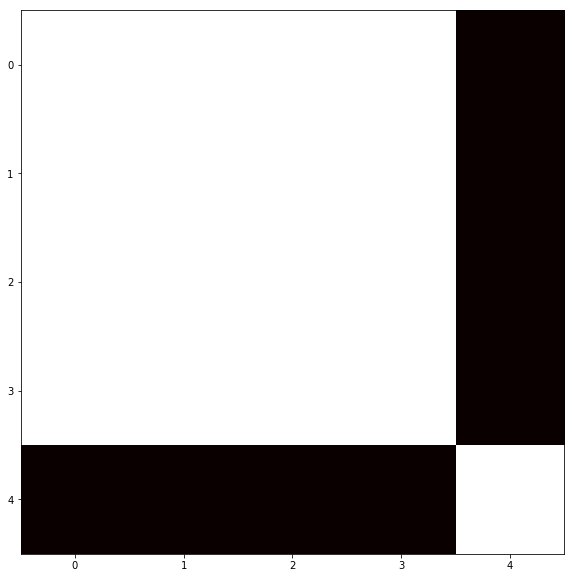

In [11]:
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.show()

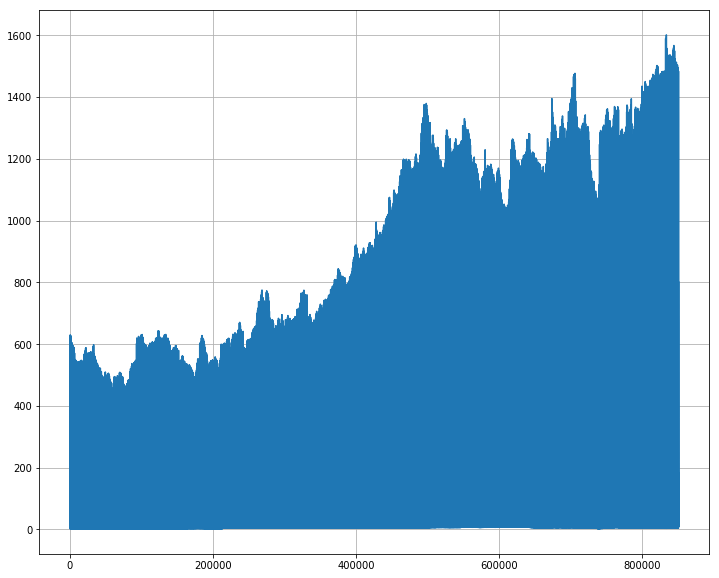

In [12]:
df.high.plot(grid=True)

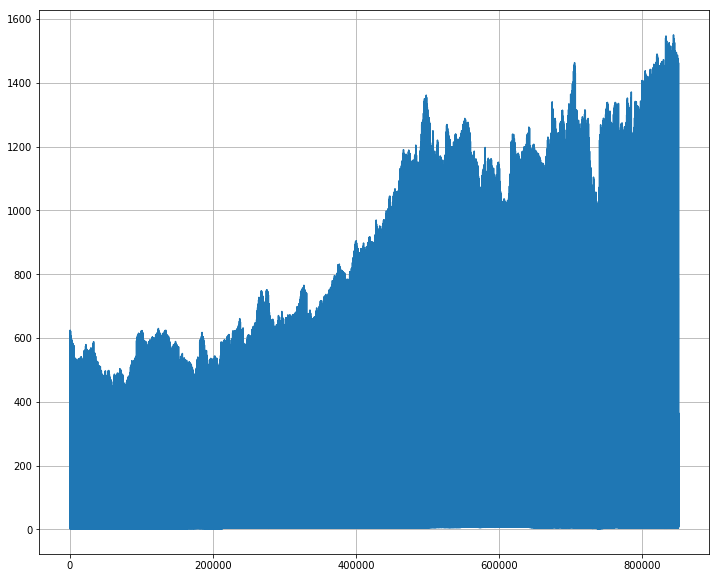

In [13]:
df.low.plot(grid=True)

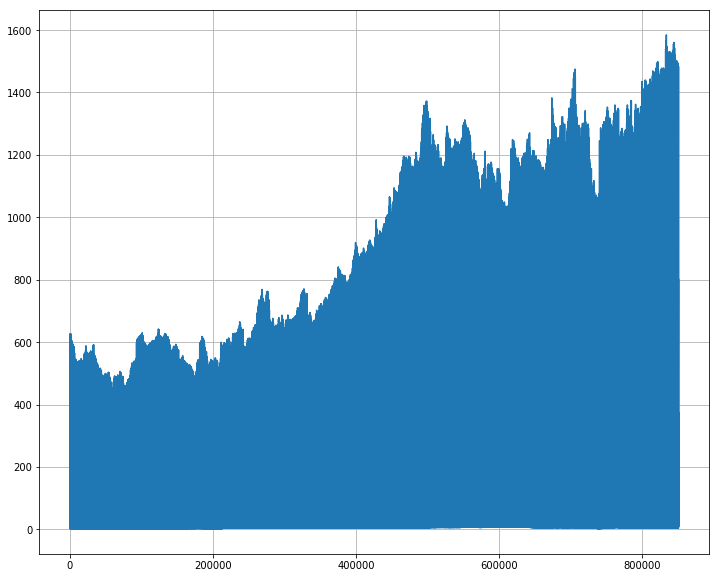

In [14]:
df.open.plot(grid=True)

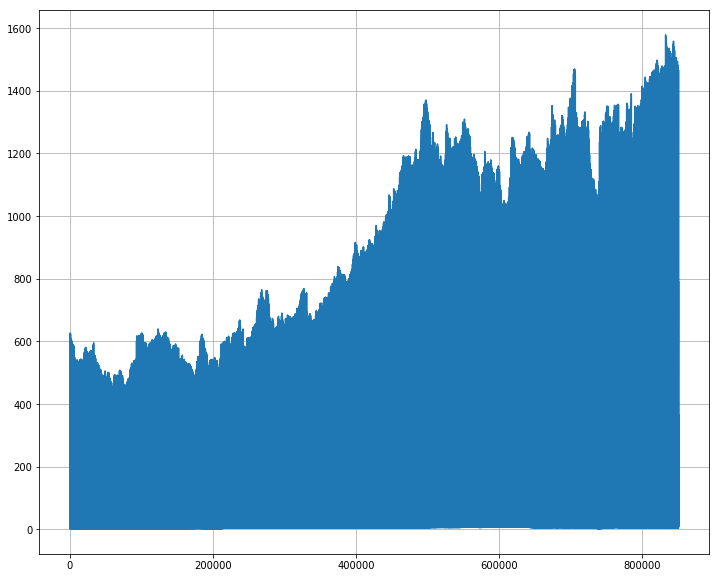

In [15]:
df.close.plot(grid=True)

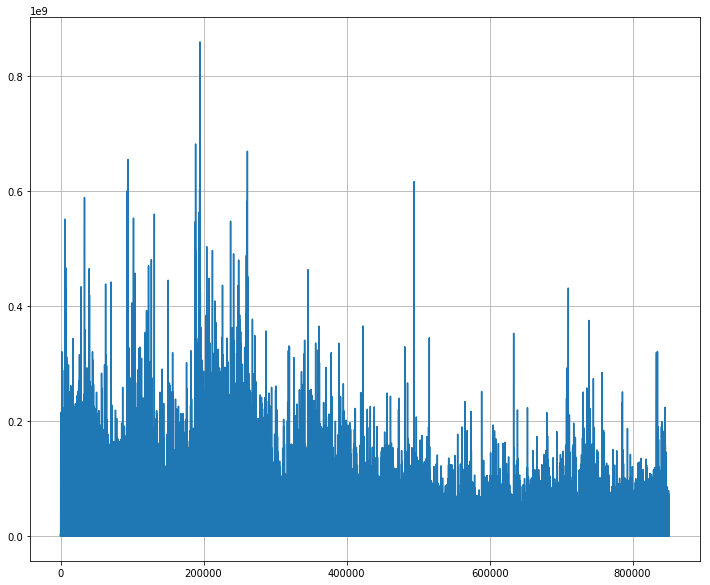

In [16]:
df.volume.plot(grid=True)

###### We have taken the values of 'GOOGLE' and taken it for some data analysis.

In [17]:
dg=df[df.symbol=='GOOG']
dg

date symbol        open       close         low        high  \
439     2010-01-04   GOOG  626.951088  626.751061  624.241073  629.511067   
907     2010-01-05   GOOG  627.181073  623.991055  621.541045  627.841071   
1375    2010-01-06   GOOG  625.861078  608.261023  606.361042  625.861078   
1843    2010-01-07   GOOG  609.401025  594.101005  592.651008  610.001045   
2311    2010-01-08   GOOG  592.000997  602.021036  589.110988  603.251034   
2779    2010-01-11   GOOG  604.461060  601.111020  594.041028  604.461060   
3247    2010-01-12   GOOG  597.651011  590.481036  588.001007  598.161034   
3715    2010-01-13   GOOG  576.490965  587.090991  573.900966  588.381027   
4183    2010-01-14   GOOG  583.900972  589.850997  582.811024  594.200988   
4651    2010-01-15   GOOG  593.341025  580.000965  578.041006  593.561024   
5119    2010-01-19   GOOG  581.201005  587.620986  576.290999  590.420997   
5587    2010-01-20   GOOG  585.981009  580.411005  575.290986  585.981009   
6055    2010-01-21   GOOG  583.441002  582.980970  572.251003  586.821000   
6523    2010-01-22   GOOG  564.500980  550.010933  534.860888  570.600979   
6991    2010-01-25   GOOG  546.590929  540.000941  535.510900  549.880931   
7459    2010-01-26   GOOG  537.970896  542.420931  536.290913  549.600954   
7927    2010-01-27   GOOG  541.270944  542.100949  535.310934  547.650920   
8395    2010-01-28   GOOG  544.490921  534.290888  530.600893  547.000908   
8863    2010-01-29   GOOG  538.490905  529.940896  525.610876  540.990906   
9331    2010-02-01   GOOG  534.600945  533.020884  530.300883  535.810910   
9799    2010-02-02   GOOG  534.960932  531.120903  527.610902  534.960932   
10267   2010-02-03   GOOG  528.670892  540.820899  528.230894  542.100949   
10735   2010-02-04   GOOG  537.000902  526.780897  525.560885  538.000915   
11203   2010-02-05   GOOG  528.400902  531.290910  522.460925  533.500888   
11671   2010-02-08   GOOG  532.500936  533.470930  531.530881  542.000905   
12139   2010-02-09   GOOG  539.540909  536.440949  535.070901  541.530949   
12607   2010-02-10   GOOG  534.070888  534.450909  527.690913  537.790902   
13075   2010-02-11   GOOG  533.320894  536.400943  529.500898  540.490931   
13543   2010-02-12   GOOG  532.970893  533.120928  530.500910  537.150938   
14011   2010-02-16   GOOG  536.870900  541.300902  534.300935  544.130933   
...            ...    ...         ...         ...         ...         ...   
836463  2016-11-17   GOOG  766.919983  771.229980  764.229980  772.700012   
836963  2016-11-18   GOOG  771.369995  760.539978  760.000000  775.000000   
837463  2016-11-21   GOOG  762.609985  769.200012  760.599976  769.700012   
837963  2016-11-22   GOOG  772.630005  768.270020  767.000000  776.960022   
838463  2016-11-23   GOOG  767.729980  760.989990  755.250000  768.283020   
838963  2016-11-25   GOOG  764.260010  761.679993  760.520020  765.000000   
839463  2016-11-28   GOOG  760.000000  768.239990  759.799988  779.530029   
839963  2016-11-29   GOOG  771.530029  770.840027  768.239990  778.500000   
840463  2016-11-30   GOOG  770.070007  758.039978  754.830017  772.989990   
840963  2016-12-01   GOOG  757.440002  747.919983  737.025024  759.849976   
841463  2016-12-02   GOOG  744.590027  750.500000  743.099976  754.000000   
841963  2016-12-05   GOOG  757.710022  762.520020  752.900024  763.900024   
842463  2016-12-06   GOOG  764.729980  759.109985  757.340027  768.830017   
842963  2016-12-07   GOOG  761.000000  771.190002  755.799988  771.359985   
843463  2016-12-08   GOOG  772.479980  776.419983  767.229980  778.179993   
843963  2016-12-09   GOOG  780.000000  789.289978  779.020996  789.429993   
844463  2016-12-12   GOOG  785.039978  789.270020  784.354980  791.250000   
844963  2016-12-13   GOOG  793.900024  796.099976  793.340027  804.380005   
845463  2016-12-14   GOOG  797.400024  797.070007  794.010010  804.000000   
845963  2016-12-15   GOOG  797.340027  797.849976  792.919983  803.000000   
846463  20

###### We have also taken the values of 'APPLE' for further analysis.

In [18]:
da=df[df.symbol=='AAPL']
da

date symbol        open       close         low        high  \
254     2010-01-04   AAPL  213.429998  214.009998  212.380001  214.499996   
721     2010-01-05   AAPL  214.599998  214.379993  213.249994  215.589994   
1189    2010-01-06   AAPL  214.379993  210.969995  210.750004  215.230000   
1657    2010-01-07   AAPL  211.750000  210.580000  209.050005  212.000006   
2125    2010-01-08   AAPL  210.299994  211.980005  209.060005  212.000006   
2593    2010-01-11   AAPL  212.799997  210.110003  208.450005  213.000002   
3061    2010-01-12   AAPL  209.189995  207.720001  206.419998  209.769995   
3529    2010-01-13   AAPL  207.870005  210.650002  204.099998  210.929995   
3997    2010-01-14   AAPL  210.110003  209.430000  209.020004  210.459997   
4465    2010-01-15   AAPL  210.929995  205.930000  205.869999  211.599997   
4933    2010-01-19   AAPL  208.330002  215.039995  207.240004  215.189999   
5401    2010-01-20   AAPL  214.910006  211.730000  209.500002  215.549994   
5869    2010-01-21   AAPL  212.079994  208.069996  207.210003  213.309996   
6337    2010-01-22   AAPL  206.780006  197.750000  197.160000  207.499996   
6805    2010-01-25   AAPL  202.510002  203.070002  200.190002  204.699999   
7273    2010-01-26   AAPL  205.950001  205.940001  202.580004  213.710005   
7741    2010-01-27   AAPL  206.849995  207.880005  199.530001  210.580000   
8209    2010-01-28   AAPL  204.930004  199.289995  198.699995  205.500004   
8677    2010-01-29   AAPL  201.079996  192.060003  190.250002  202.199995   
9145    2010-02-01   AAPL  192.369997  194.729998  191.299999  196.000000   
9613    2010-02-02   AAPL  195.909998  195.859997  193.379993  196.319994   
10081   2010-02-03   AAPL  195.169994  199.229994  194.420004  200.200003   
10549   2010-02-04   AAPL  196.730003  192.050003  191.570005  198.370001   
11017   2010-02-05   AAPL  192.630003  195.460001  190.850002  196.000000   
11485   2010-02-08   AAPL  195.690006  194.119997  193.999994  197.880003   
11953   2010-02-09   AAPL  196.419996  196.190004  194.749998  197.499994   
12421   2010-02-10   AAPL  195.889997  195.120007  194.260000  196.600000   
12889   2010-02-11   AAPL  194.880001  198.669994  194.059996  199.750006   
13357   2010-02-12   AAPL  198.109995  200.379993  195.500002  201.639996   
13825   2010-02-16   AAPL  201.940002  203.399996  201.520006  203.690002   
...            ...    ...         ...         ...         ...         ...   
836267  2016-11-17   AAPL  109.809998  109.949997  108.830002  110.349998   
836767  2016-11-18   AAPL  109.720001  110.059998  109.660004  110.540001   
837267  2016-11-21   AAPL  110.120003  111.730003  110.010002  111.989998   
837767  2016-11-22   AAPL  111.949997  111.800003  111.400002  112.419998   
838267  2016-11-23   AAPL  111.360001  111.230003  110.330002  111.510002   
838767  2016-11-25   AAPL  111.129997  111.790001  110.949997  111.870003   
839267  2016-11-28   AAPL  111.430000  111.570000  111.389999  112.470001   
839767  2016-11-29   AAPL  110.779999  111.459999  110.070000  112.029999   
840267  2016-11-30   AAPL  111.599998  110.519997  110.269997  112.199997   
840767  2016-12-01   AAPL  110.370003  109.489998  109.029999  110.940002   
841267  2016-12-02   AAPL  109.169998  109.900002  108.849998  110.089996   
841767  2016-12-05   AAPL  110.000000  109.110001  108.250000  110.029999   
842267  2016-12-06   AAPL  109.500000  109.949997  109.190002  110.360001   
842767  2016-12-07   AAPL  109.260002  111.029999  109.160004  111.190002   
843267  2016-12-08   AAPL  110.860001  112.120003  110.599998  112.430000   
843767  2016-12-09   AAPL  112.309998  113.949997  112.309998  114.699997   
844267  2016-12-12   AAPL  113.290001  113.300003  112.489998  115.000000   
844767  2016-12-13   AAPL  113.839996  115.190002  113.750000  115.919998   
845267  2016-12-14   AAPL  115.040001  115.190002  114.980003  116.199997   
845767  2016-12-15   AAPL  115.379997  115.820000  115.230003  116.730003   
846267  20

###### Same way, we are also taking the data of 'MICROSOFT' for further plotting and analysis.

In [19]:
dm=df[df.symbol=="MSFT"]
dm

date symbol       open      close        low       high  \
544     2010-01-04   MSFT  30.620001  30.950001  30.590000  31.100000   
1012    2010-01-05   MSFT  30.850000  30.959999  30.639999  31.100000   
1480    2010-01-06   MSFT  30.879999  30.770000  30.520000  31.080000   
1948    2010-01-07   MSFT  30.629999  30.450001  30.190001  30.700001   
2416    2010-01-08   MSFT  30.280001  30.660000  30.240000  30.879999   
2884    2010-01-11   MSFT  30.709999  30.270000  30.120001  30.760000   
3352    2010-01-12   MSFT  30.150000  30.070000  29.910000  30.400000   
3820    2010-01-13   MSFT  30.260000  30.350000  30.010000  30.520000   
4288    2010-01-14   MSFT  30.309999  30.959999  30.260000  31.100000   
4756    2010-01-15   MSFT  31.080000  30.860001  30.709999  31.240000   
5224    2010-01-19   MSFT  30.750000  31.100000  30.680000  31.240000   
5692    2010-01-20   MSFT  30.809999  30.590000  30.309999  30.940001   
6160    2010-01-21   MSFT  30.610001  30.010000  30.000000  30.719999   
6628    2010-01-22   MSFT  30.000000  28.959999  28.840000  30.200001   
7096    2010-01-25   MSFT  29.240000  29.320000  29.100000  29.660000   
7564    2010-01-26   MSFT  29.200001  29.500000  29.090000  29.850000   
8032    2010-01-27   MSFT  29.350000  29.670000  29.020000  29.820000   
8500    2010-01-28   MSFT  29.840000  29.160000  28.889999  29.870001   
8968    2010-01-29   MSFT  29.900000  28.180000  27.660000  29.920000   
9436    2010-02-01   MSFT  28.389999  28.410000  27.920000  28.480000   
9904    2010-02-02   MSFT  28.370001  28.459999  28.139999  28.500000   
10372   2010-02-03   MSFT  28.260000  28.629999  28.120001  28.790001   
10840   2010-02-04   MSFT  28.379999  27.840000  27.809999  28.500000   
11308   2010-02-05   MSFT  28.000000  28.020000  27.570000  28.280001   
11776   2010-02-08   MSFT  28.010000  27.719999  27.570000  28.080000   
12244   2010-02-09   MSFT  27.969999  28.010000  27.750000  28.340000   
12712   2010-02-10   MSFT  28.030001  27.990000  27.840000  28.240000   
13180   2010-02-11   MSFT  27.930000  28.120001  27.700001  28.400000   
13648   2010-02-12   MSFT  27.809999  27.930000  27.580000  28.059999   
14116   2010-02-16   MSFT  28.129999  28.350000  28.020000  28.370001   
...            ...    ...        ...        ...        ...        ...   
836576  2016-11-17   MSFT  60.410000  60.639999  59.970001  60.950001   
837076  2016-11-18   MSFT  60.779999  60.349998  60.299999  61.139999   
837576  2016-11-21   MSFT  60.500000  60.860001  60.419998  60.970001   
838076  2016-11-22   MSFT  60.980000  61.119999  60.810001  61.259998   
838576  2016-11-23   MSFT  61.009998  60.400002  60.250000  61.099998   
839076  2016-11-25   MSFT  60.299999  60.529999  60.130001  60.529999   
839576  2016-11-28   MSFT  60.340000  60.610001  60.209999  61.020000   
840076  2016-11-29   MSFT  60.650002  61.090000  60.520000  61.410000   
840576  2016-11-30   MSFT  60.860001  60.259998  60.220001  61.180000   
841076  2016-12-01   MSFT  60.110001  59.200001  58.939999  60.150002   
841576  2016-12-02   MSFT  59.080002  59.250000  58.799999  59.470001   
842076  2016-12-05   MSFT  59.700001  60.220001  59.560001  60.590000   
842576  2016-12-06   MSFT  60.430000  59.950001  59.799999  60.459999   
843076  2016-12-07   MSFT  60.009998  61.369999  59.799999  61.380001   
843576  2016-12-08   MSFT  61.299999  61.009998  60.840000  61.580002   
844076  2016-12-09   MSFT  61.180000  61.970001  61.130001  61.990002   
844576  2016-12-12   MSFT  61.820000  62.169998  61.720001  62.299999   
845076  2016-12-13   MSFT  62.500000  62.980000  62.240002  63.419998   
845576  2016-12-14   MSFT  63.000000  62.680000  62.529999  63.450001   
846076  2016-12-15   MSFT  62.700001  62.580002  62.299999  63.150002   
846576  2016-12-16   MSFT  62.950001  62.299999  62.119999  62.950001   
847076  2016-12-19   MSFT  62.560001  63.619999  62.419998  63.770000   
847576  2016-12-20   MSFT  63.689999  63.540001  63.029999  63.799999   

###### Plotting the high values and volume of stocks of GOOGLE...

[[629.511067 627.841071 625.861078 ... 794.22998  785.929993 782.780029]]
[[3927000. 6031900. 7987100. ... 1132700.  742200. 1760200.]]


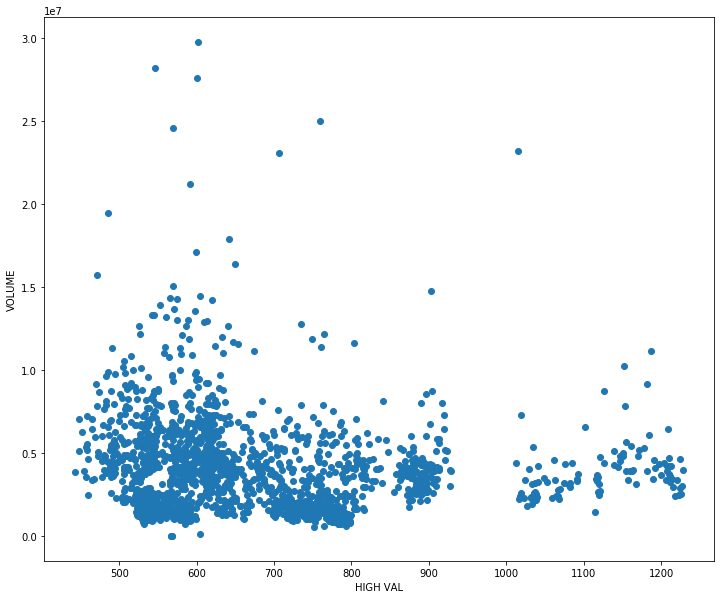

In [20]:
X = dg['high'].values
X = X.reshape(-1,len(X))
print(X)
Y = dg['volume'].values
Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('HIGH VAL')
plt.ylabel('VOLUME')

plt.scatter(X,Y)

###### Plotting the stock opening values and closing of stocks of GOOGLE...

[626.951088 627.181073 625.861078 ... 793.700012 783.330017 782.75    ]
[626.751061 623.991055 608.261023 ... 785.049988 782.789978 771.820007]


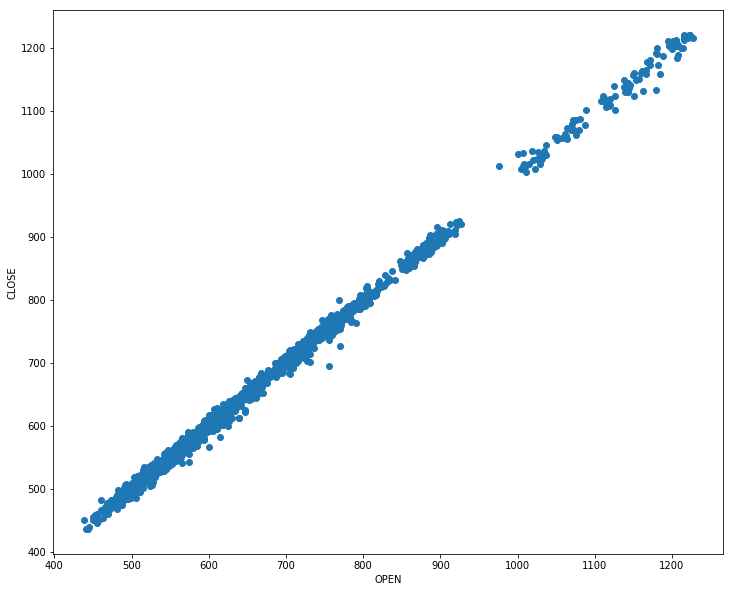

In [21]:
X = dg['open'].values

print(X)
Y = dg['close'].values

print(Y)

plt.xlabel('OPEN')
plt.ylabel('CLOSE')

plt.scatter(X,Y)

In [22]:
plt.rcParams['figure.figsize'] = (20, 9) 

#### Here is the plot for just the opening values of GOOGLE. As we can see there is a very deep and sudden fall in the opening value somewhere in the middle of the graph. This could indicate some failure event of a product or a service on the previous day or a somewhat failed product or service launch. However the graph has again risen after that.

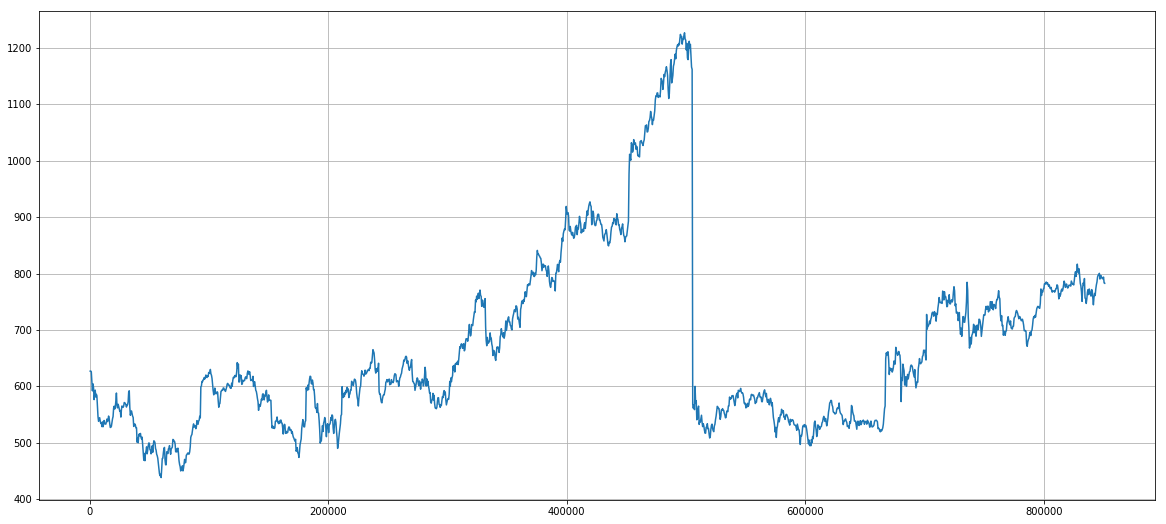

In [23]:
dg.open.plot(grid=True)

#### Here is the plot for just the opening values of APPLE. As we can see there is a very deep and sudden fall in the last quarter of the graph. This could indicate some failure event of a product or a service on the previous day or a somewhat failed product or service launch. However the graph has again risen after that.

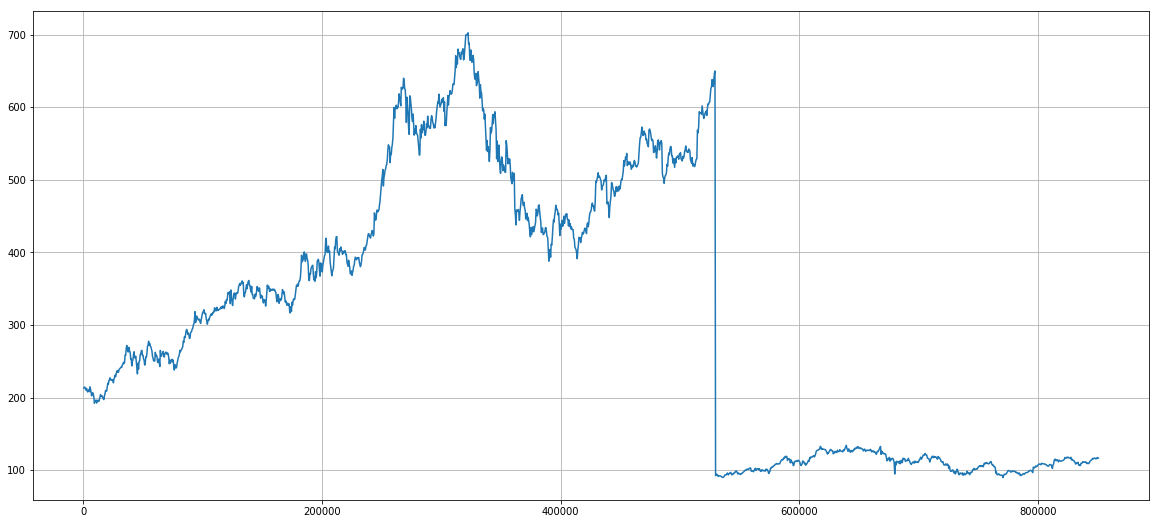

In [24]:
da.open.plot(grid=True)

#### Unlike the above two, this graph is actually continuously rising graph with occasional and obvious spikes in the value which are fairly considerable because of the fluctuating market situations that might have occurred. Other than that, there seems to be no failure event which affected stock values of APPLE.

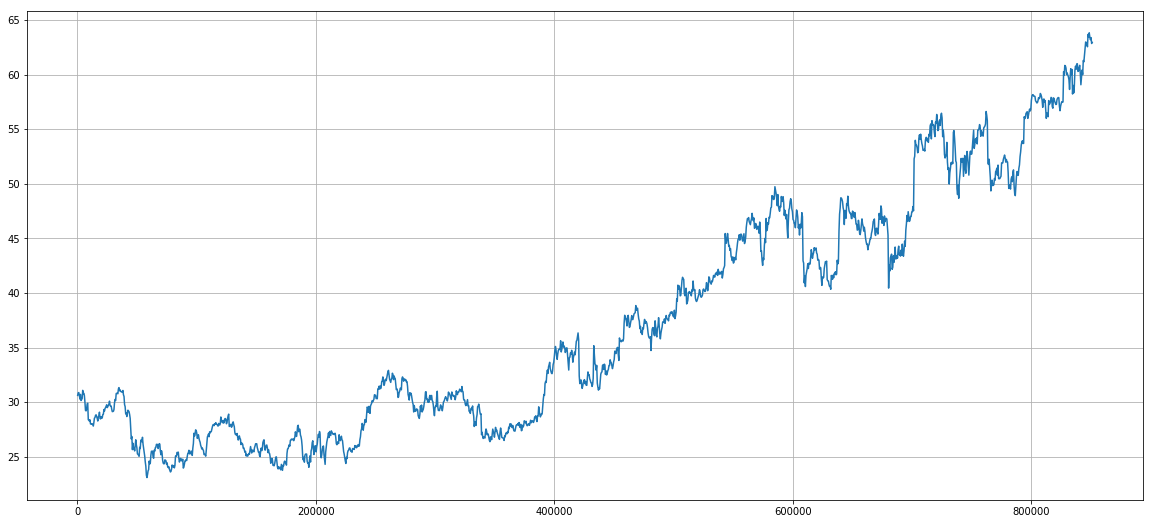

In [25]:
dm.open.plot(grid=True)

[626.951088 627.181073 625.861078 ... 793.700012 783.330017 782.75    ]
[626.751061 623.991055 608.261023 ... 785.049988 782.789978 771.820007]


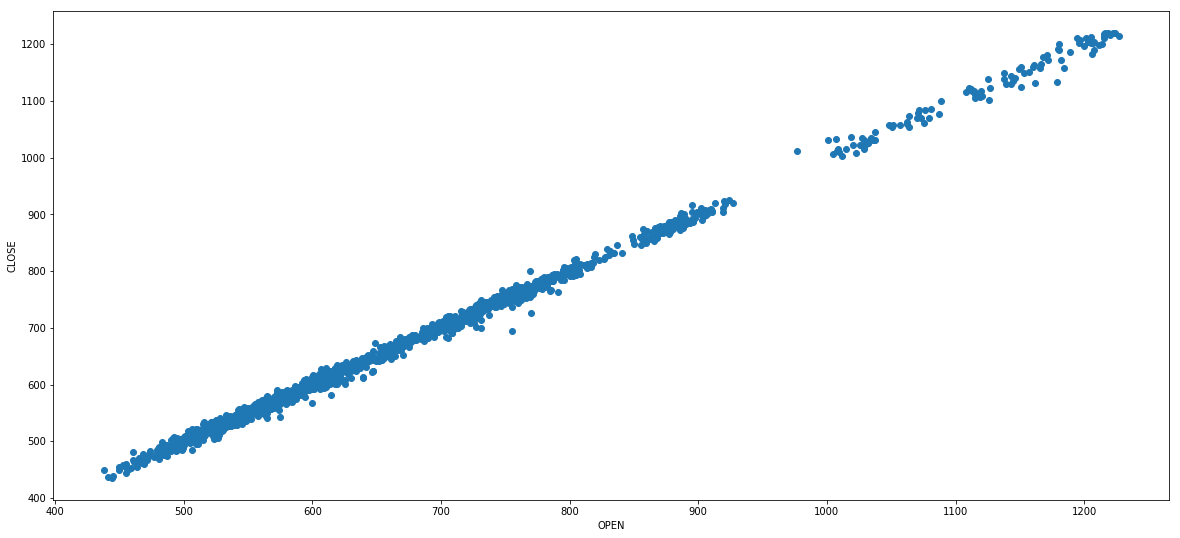

In [26]:
X = dg['open'].values

print(X)
Y = dg['close'].values

print(Y)

plt.xlabel('OPEN')
plt.ylabel('CLOSE')

plt.scatter(X,Y)

[213.429998 214.599998 214.379993 ... 117.519997 116.449997 116.650002]
[214.009998 214.379993 210.969995 ... 116.760002 116.730003 115.82    ]


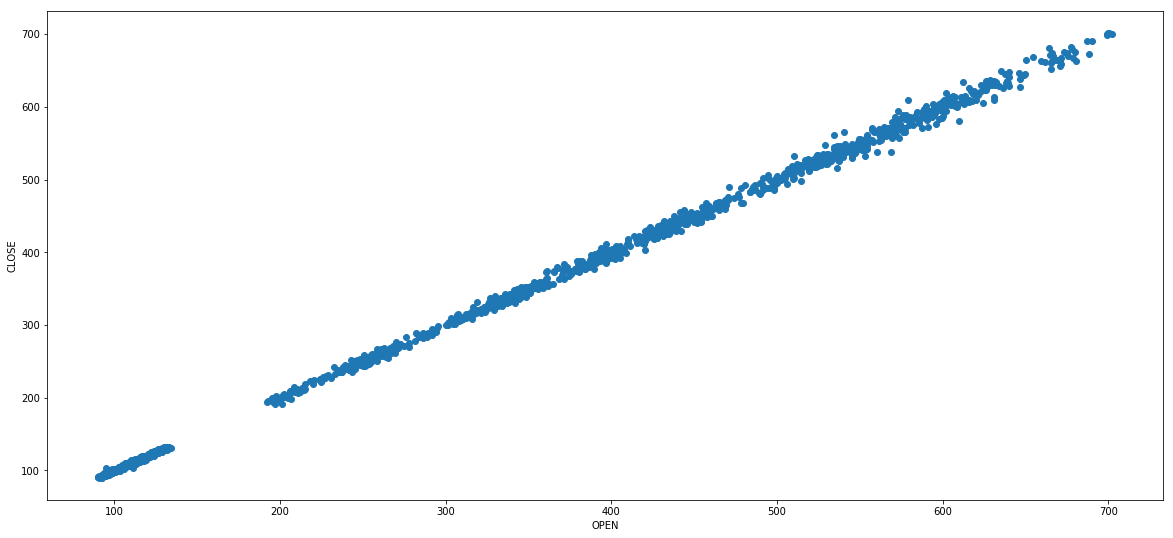

In [27]:
X = da['open'].values

print(X)
Y = da['close'].values

print(Y)

plt.xlabel('OPEN')
plt.ylabel('CLOSE')

plt.scatter(X,Y)

[30.620001 30.85     30.879999 ... 63.400002 62.860001 62.959999]
[30.950001 30.959999 30.77     ... 62.990002 62.900002 62.139999]


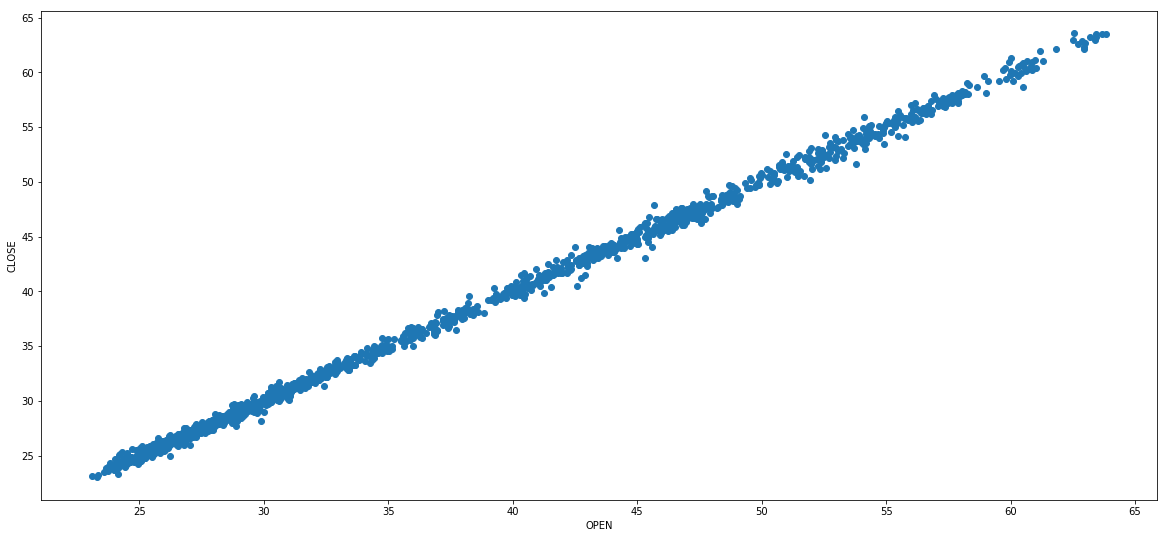

In [28]:
X = dm['open'].values

print(X)
Y = dm['close'].values

print(Y)

plt.xlabel('OPEN')
plt.ylabel('CLOSE')

plt.scatter(X,Y)

In [29]:
dg['HL_PCT'] = (dg['high'] - dg['close']) / dg['close'] * 100.0
dg['PCT_Change'] = (dg['close'] - dg['open']) / dg['close'] * 100.0

dg = dg[['open','close','high','low','HL_PCT','PCT_Change']]
print(dg)

              open       close        high         low    HL_PCT  PCT_Change
439     626.951088  626.751061  629.511067  624.241073  0.440367   -0.031915
907     627.181073  623.991055  627.841071  621.541045  0.616999   -0.511228
1375    625.861078  608.261023  625.861078  606.361042  2.893504   -2.893504
1843    609.401025  594.101005  610.001045  592.651008  2.676319   -2.575323
2311    592.000997  602.021036  603.251034  589.110988  0.204311    1.664400
2779    604.461060  601.111020  604.461060  594.041028  0.557308   -0.557308
3247    597.651011  590.481036  598.161034  588.001007  1.300634   -1.214260
3715    576.490965  587.090991  588.381027  573.900966  0.219734    1.805517
4183    583.900972  589.850997  594.200988  582.811024  0.737473    1.008734
4651    593.341025  580.000965  593.561024  578.041006  2.337937   -2.300007
5119    581.201005  587.620986  590.420997  576.290999  0.476499    1.092538
5587    585.981009  580.411005  585.981009  575.290986  0.959665   -0.959665

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
da['HL_PCT'] = (da['high'] - da['close']) / da['close'] * 100.0
da['PCT_Change'] = (da['close'] - da['open']) / da['close'] * 100.0

da = da[['open','close','high','low','HL_PCT','PCT_Change']]
print(da)

              open       close        high         low    HL_PCT  PCT_Change
254     213.429998  214.009998  214.499996  212.380001  0.228960    0.271015
721     214.599998  214.379993  215.589994  213.249994  0.564419   -0.102624
1189    214.379993  210.969995  215.230000  210.750004  2.019247   -1.616343
1657    211.750000  210.580000  212.000006  209.050005  0.674331   -0.555608
2125    210.299994  211.980005  212.000006  209.060005  0.009435    0.792533
2593    212.799997  210.110003  213.000002  208.450005  1.375469   -1.280279
3061    209.189995  207.720001  209.769995  206.419998  0.986903   -0.707681
3529    207.870005  210.650002  210.929995  204.099998  0.132919    1.319723
3997    210.110003  209.430000  210.459997  209.020004  0.491810   -0.324692
4465    210.929995  205.930000  211.599997  205.869999  2.753361   -2.428007
4933    208.330002  215.039995  215.189999  207.240004  0.069756    3.120347
5401    214.910006  211.730000  215.549994  209.500002  1.804182   -1.501916

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
dm['HL_PCT'] = (dm['high'] - dm['close']) / dm['close'] * 100.0
dm['PCT_Change'] = (dm['close'] - dm['open']) / dm['close'] * 100.0

dm = dm[['open','close','high','low','HL_PCT','PCT_Change']]
print(dm)

             open      close       high        low    HL_PCT  PCT_Change
544     30.620001  30.950001  31.100000  30.590000  0.484649    1.066236
1012    30.850000  30.959999  31.100000  30.639999  0.452200    0.355294
1480    30.879999  30.770000  31.080000  30.520000  1.007475   -0.357488
1948    30.629999  30.450001  30.700001  30.190001  0.821018   -0.591126
2416    30.280001  30.660000  30.879999  30.240000  0.717544    1.239397
2884    30.709999  30.270000  30.760000  30.120001  1.618764   -1.453581
3352    30.150000  30.070000  30.400000  29.910000  1.097439   -0.266046
3820    30.260000  30.350000  30.520000  30.010000  0.560132    0.296540
4288    30.309999  30.959999  31.100000  30.260000  0.452200    2.099483
4756    31.080000  30.860001  31.240000  30.709999  1.231364   -0.712894
5224    30.750000  31.100000  31.240000  30.680000  0.450161    1.125402
5692    30.809999  30.590000  30.940001  30.309999  1.144168   -0.719186
6160    30.610001  30.010000  30.719999  30.000000 

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[[0.44036718 0.61699859 2.89350367 ... 1.16935127 0.40113122 1.42002305]]
[[-0.0319149  -0.51122816 -2.89350367 ... -1.10184372 -0.068989
  -1.41613238]]


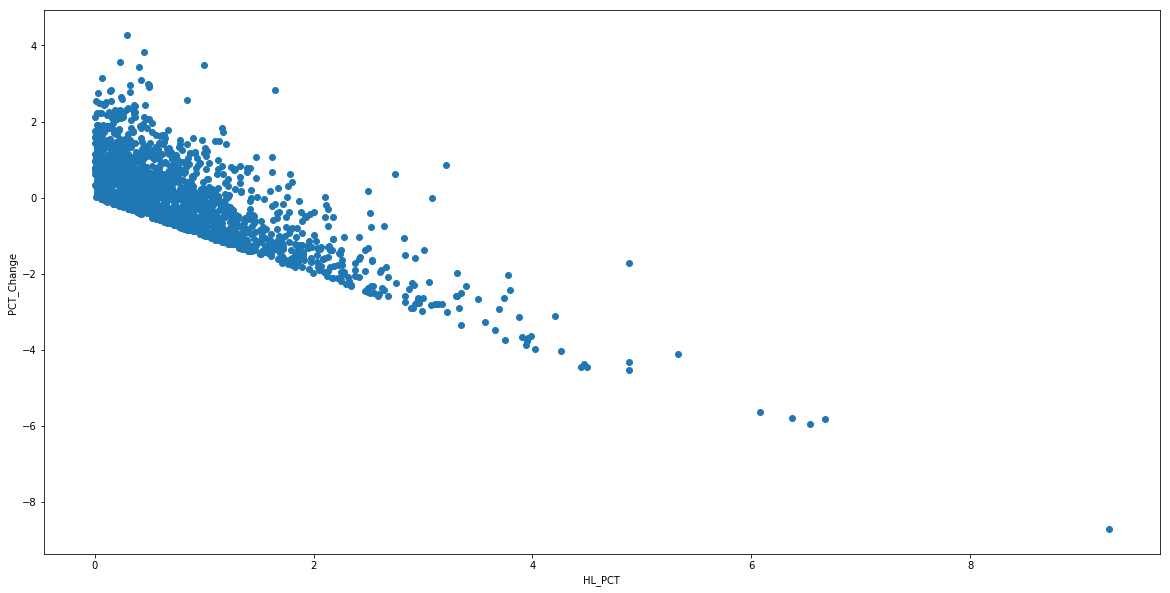

In [32]:
plt.rcParams["figure.figsize"] = [20,10]
X = dg['HL_PCT'].values
X = X.reshape(-1,len(X))
print(X)
Y = dg['PCT_Change'].values
Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('HL_PCT')
plt.ylabel('PCT_Change')

plt.scatter(X,Y)

[[0.22896033 0.56441881 2.01924686 ... 1.07913239 0.32553584 1.19150147]]
[[ 0.27101538 -0.10262385 -1.61634265 ... -0.65090355  0.23987492
  -0.71663098]]


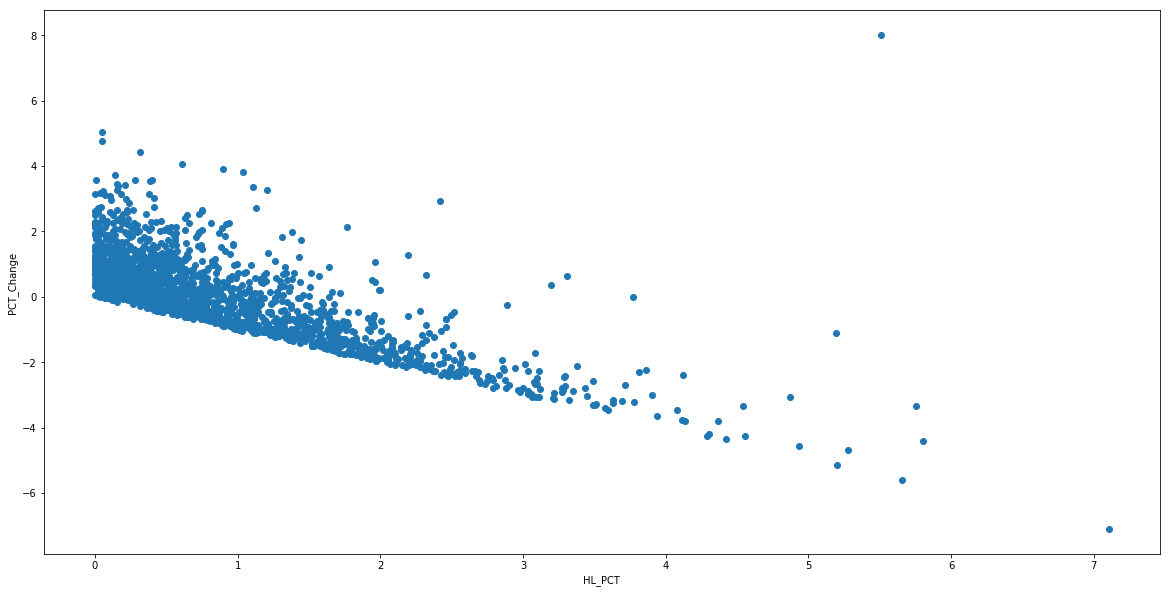

In [33]:
plt.rcParams["figure.figsize"] = [20,10]
X = da['HL_PCT'].values
X = X.reshape(-1,len(X))
print(X)
Y = da['PCT_Change'].values
Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('HL_PCT')
plt.ylabel('PCT_Change')

plt.scatter(X,Y)

[[0.48464942 0.45219963 1.00747481 ... 0.65089695 0.47694593 1.36788383]]
[[ 1.06623583  0.35529394 -0.35748781 ... -0.65089695  0.06359459
  -1.31960092]]


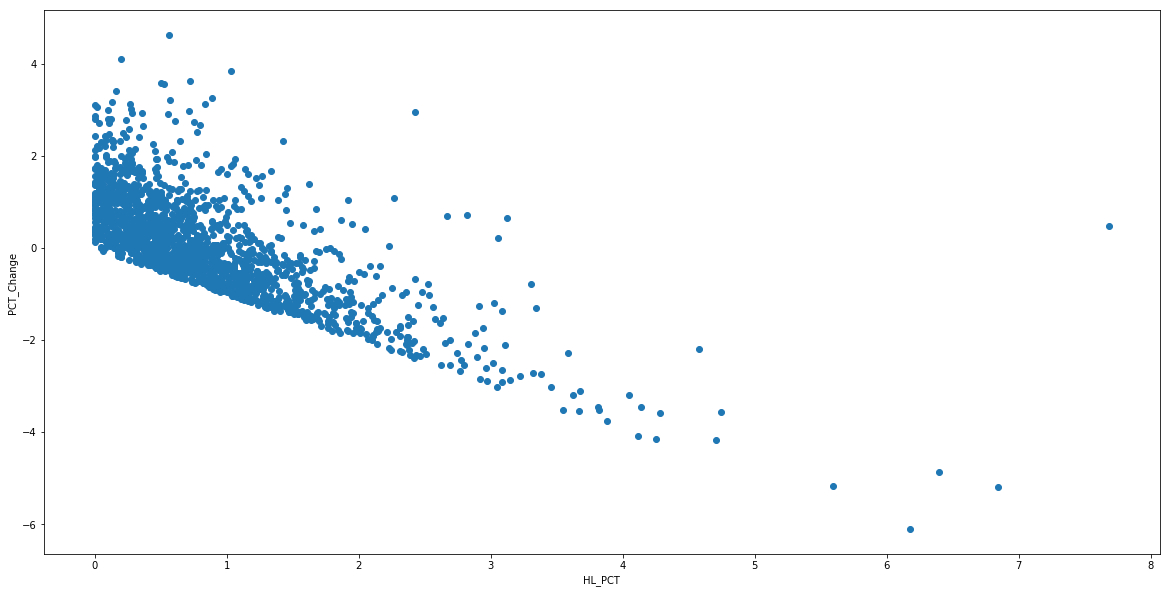

In [34]:
plt.rcParams["figure.figsize"] = [20,10]
X = dm['HL_PCT'].values
X = X.reshape(-1,len(X))
print(X)
Y = dm['PCT_Change'].values
Y = Y.reshape(-1,len(Y))
print(Y)

plt.xlabel('HL_PCT')
plt.ylabel('PCT_Change')

plt.scatter(X,Y)

# III. Methods

- Summarize the nonlinear regression model. 

## Non-linear Extension of Linear Model

As we discussed, feed forward neural networks have a rich representation. Thus, it can represent the linear model with single layer. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/mlp_linear.png" width=400/>

Considering the multiple outputs, we formulated this in matrix: 

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 \\
\\
\Ym &= \Xlm \cdot \Wm
\end{align}
$$

Here, we assume the first column of $\Xlm$ is the bias column with 1's.  
Thus, the weight matrix $\Wm$ is $(D+1) \times K$ with the bias row in the first row.   

From this model, we can convert the raw data $\Xm$ to $\Phiv$, which is a nonlinear mapping.

$$
\phi: \Xm \rightarrow \Phiv
$$

Then, we can rewrite the linear model with as follows:

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 
\\
\Ym &= \Phiv \Wm \\ 
\\
\Ym_{nk} &= \Phiv_n^\top \Wm_k 
\end{align}
$$

Now, let $\phi(\xv) = h(\xv)$ where $h$ is the *activation function*.  

$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$

Figure below depics this model. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nn.png" width=500/>

The size of each matrix is listed: 
- $\Xm: N \times D$
- $\Xlm: N \times (D+1)$
- $\Vm: (D+1) \times G$
- $\Zm: N \times G$
- $\Zlm: N \times (G+1)$
- $\Wm: (G+1) \times K$
- $\Ym: N \times K$

For this two-layer network, we call the blue circle layer with the activation functions as **hidden layer** and the organge layer with summation as **output layer**.


- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes. 
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

### NeuralNet Class for NonLinear Regression

In [35]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

This is a simple standardization class which standardizes the input and target data by calculating mean, standard deviation, min and max and then has two functions to apply the standardization and unstandardization methods on the input and target data. 

In [36]:

from grad import scg, steepest
from copy import copy


class NeuralNet:

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

- For the above neuralnet class, we begin with a regular init function which initializes the important parameters and variables we are going to use in the rest of the class. This basically includes the rho, weights, dimensions and number of layers, standardize and unstandardize initializations.
- The addOnes function will simply return a new array of given shape and type, filled with ones.
- The nlayers funtion will return the number of layers into the selected neural network.
- In the set hunit function, the shapes of weights are checked to see if they match. If they don't, an error string with shapes do not match is returned.
- The pack function will return a contiguos 1D array containing the elements of the input with same type.
- The unpack function again set the weights after being checked from the hunit function.
- The function cp weight is doing nothing but copying the weight matrix and returning a copy of weights.
- The RBF (Radial Basis Function) checks the values of m and s and then evaluates the RB function to return the value of radial function with the formula r * np.exp(-(X - m) ** 2 / (2 * s ** 2)).
- Next comes the forward pass function, which really enables the forward prcocessing of the neural network. It will carry out dot product and pass it through the activation function. Once this is calculated for the t matrix, our function returns the t,z matrix.
- The backward fucntion enables the backward processing or back propogation of the neural network. Herein, we are circulating the output back into the network and changing the weights and then again adding it as input to reduce the error by adjusting the weights. Backpropagation is a method used in artificial neural networks to calculate a gradient that is needed in the calculation of the weights to be used in the network. The error values are propogated backwards into the network, since an error is computed at the output and distributed backwards throughout the network's layers.
- The error function is just the difference between the actual target and the output.
- The objectf function will return the mean of the square of the errors with added weight penalty which will be used in the backward propogation.
- The train function is essentially used to train the neural network where we first standardize the input data X and the target data T and the paramets for training are set.
- The gradient function will calculate the error gradient for the backward propogation of the neural network by first making a forward pass, then calculating the errors at the output and then propogating it back to the beginning using backward function to calculate the gradient.
- The optimf function is going to optimize the values using various gradient descent fumctions like STOCHASTIC GRADIENT DESCENT or STEEPEST GRADIENT DESCENT and check which optimizer was selected and why it was selected.
- The use function is for testing out built model of the neural network. Here again standardization and unstandardization procedures take place and the neural network is started using the forward function. Result or output is returned.

### PRELIMINARY TESTS

- We use the same test as provided in the Notebook for nonlinear neural networks by generating data with specified nonlinear functions. The data has been somewhat changed from the notebook and hence is not exactly as same as the reading assignment.
- We plot the graphs for RMSE, accuracy and hidden units graph.
- Various tests have been done by altering the number of hidden units and number of repitions.
- Training and testing data has been generated by nonlinear function and this data has been used as the input and the target.
- Train and use functions have been used for this generated non lienar data.

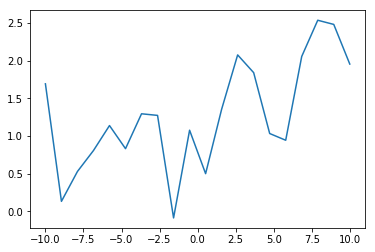

In [37]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output
import time  # for sleep


# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.4 + 0.07 * (X+12) + 0.6 * np.sin(X+12) + 0.4 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.4 + 0.07 * (Xtest+12) + 0.6 * np.sin(Xtest+12) + 0.4 * np.random.normal(size=(n,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

plt.plot(X,T)

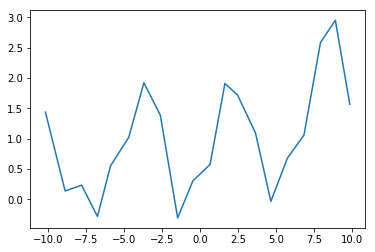

In [38]:
plt.plot(Xtest,Ttest)

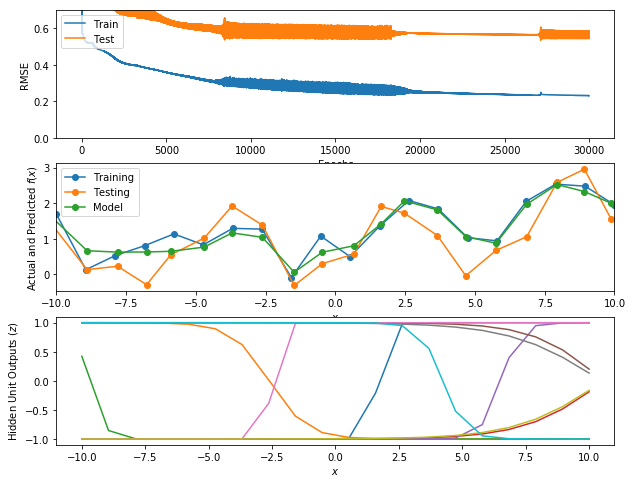

In [39]:
# Set parameters of neural network
nHiddens = 10

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(1+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)
X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nReps steepest descent steps in gradient descent search in mean-squared-error function
nReps = 30000
# collect training and testing errors for plotting
errorTrace = np.zeros((nReps,2))

fig = plt.figure(figsize=(10,8))
for reps in range(nReps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y

    # TODO: Backward pass - the backpropagation and weight update steps
    V = V + rh * X1.T @ ( ( error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error    

    # error traces for plotting
    errorTrace[reps,0] = np.sqrt(np.mean((error**2)))
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[reps,1] = np.sqrt(np.mean((Ytest-Ttest)**2))

    if reps % 1000 == 0 or reps == nReps-1:
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:reps,:])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')
        
        plt.subplot(3,1,2)
        plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        plt.subplot(3,1,3)
        plt.plot(X,Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

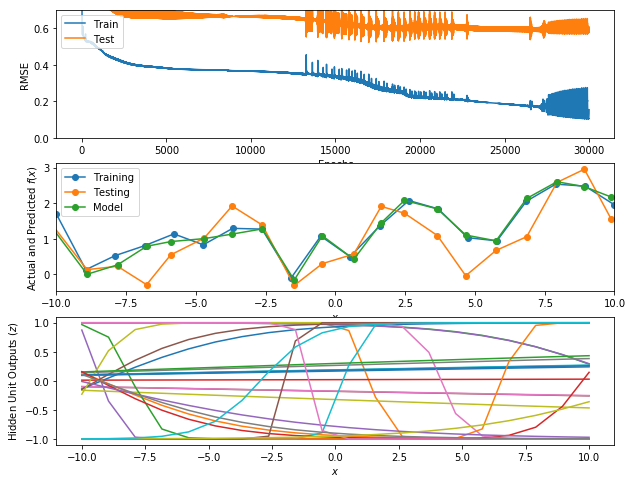

In [40]:
# Set parameters of neural network
nHiddens = 30

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(1+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)
X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nReps steepest descent steps in gradient descent search in mean-squared-error function
nReps = 30000
# collect training and testing errors for plotting
errorTrace = np.zeros((nReps,2))

fig = plt.figure(figsize=(10,8))
for reps in range(nReps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y

    # TODO: Backward pass - the backpropagation and weight update steps
    V = V + rh * X1.T @ ( ( error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error    

    # error traces for plotting
    errorTrace[reps,0] = np.sqrt(np.mean((error**2)))
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[reps,1] = np.sqrt(np.mean((Ytest-Ttest)**2))

    if reps % 1000 == 0 or reps == nReps-1:
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:reps,:])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')
        
        plt.subplot(3,1,2)
        plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        plt.subplot(3,1,3)
        plt.plot(X,Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

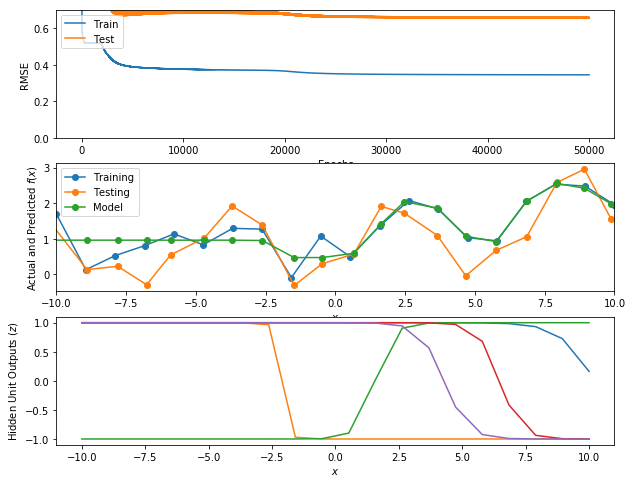

In [41]:
# Set parameters of neural network
nHiddens = 5

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(1+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)
X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nReps steepest descent steps in gradient descent search in mean-squared-error function
nReps = 50000
# collect training and testing errors for plotting
errorTrace = np.zeros((nReps,2))

fig = plt.figure(figsize=(10,8))
for reps in range(nReps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y

    # TODO: Backward pass - the backpropagation and weight update steps
    V = V + rh * X1.T @ ( ( error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error    

    # error traces for plotting
    errorTrace[reps,0] = np.sqrt(np.mean((error**2)))
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[reps,1] = np.sqrt(np.mean((Ytest-Ttest)**2))

    if reps % 1000 == 0 or reps == nReps-1:
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:reps,:])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')
        
        plt.subplot(3,1,2)
        plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        plt.subplot(3,1,3)
        plt.plot(X,Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

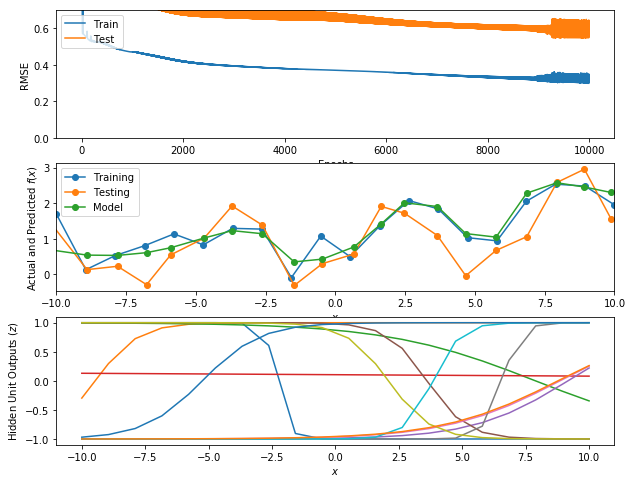

In [42]:
# Set parameters of neural network
nHiddens = 12

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(1+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)
X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nReps steepest descent steps in gradient descent search in mean-squared-error function
nReps = 10000
# collect training and testing errors for plotting
errorTrace = np.zeros((nReps,2))

fig = plt.figure(figsize=(10,8))
for reps in range(nReps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y

    # TODO: Backward pass - the backpropagation and weight update steps
    V = V + rh * X1.T @ ( ( error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error    

    # error traces for plotting
    errorTrace[reps,0] = np.sqrt(np.mean((error**2)))
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[reps,1] = np.sqrt(np.mean((Ytest-Ttest)**2))

    if reps % 1000 == 0 or reps == nReps-1:
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:reps,:])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')
        
        plt.subplot(3,1,2)
        plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        plt.subplot(3,1,3)
        plt.plot(X,Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

### APPLYING ON MY DATASET :

In [43]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

datf = df.sample(10000)

nnet = NeuralNet([10,3,10])

#X = np.asarray(X)
#T = np.asarray(T)

X = datf.loc[:,'open'].values.reshape(1000,10)
X.shape
T = datf.loc[:,'close'].values.reshape(1000,10)
T.shape
print(X.shape,T.shape)
#X1 = addOnes(X)
#X1[:5].shape

#T1 = addOnes(T)
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3,random_state=42)

#print(X.shape,T.shape,X_train.shape,T_train.shape,X_test.shape,T_test.shape)

(1000, 10) (1000, 10)


In [44]:
nnet.train(X_train,T_train)

{'w': array([-3.30885215e-02,  1.68734260e-01,  4.58222121e-03,  4.09276672e-02,
        -9.64371737e-03, -1.50285502e-02, -2.17867760e-02, -3.67312757e-02,
         2.81424892e-02, -1.19866926e-03, -4.85295853e-02, -6.72940243e-03,
         1.49201775e-02, -4.40116552e-02, -3.35733337e-02,  3.42887507e-02,
         2.43852239e-03,  1.67229746e-02, -3.48806642e-02,  3.47564263e-04,
        -2.25538364e-02, -2.31369093e-02, -1.19943270e-02,  3.00648949e-02,
         1.95865057e-02,  2.06580830e-02,  2.76081234e-02, -2.34085188e-03,
        -4.13893000e-03,  2.36509987e-02, -1.29387537e-02,  2.34767658e-02,
        -2.47748663e-02,  5.08250183e-01,  8.39072787e-01,  1.21246152e+00,
         1.17112346e+00,  2.06478711e-01, -2.87631655e-01,  1.94498471e-01,
        -3.20779814e-01,  1.28633917e-01, -6.92196247e-01,  7.12668195e+00,
        -3.29432080e+00,  9.23449779e-02,  2.69904950e+00,  6.10621362e+00,
        -6.20186897e+00, -3.70388290e+00,  3.56529045e+00, -1.62824134e-01,
       

In [45]:
Y = nnet.use(T)

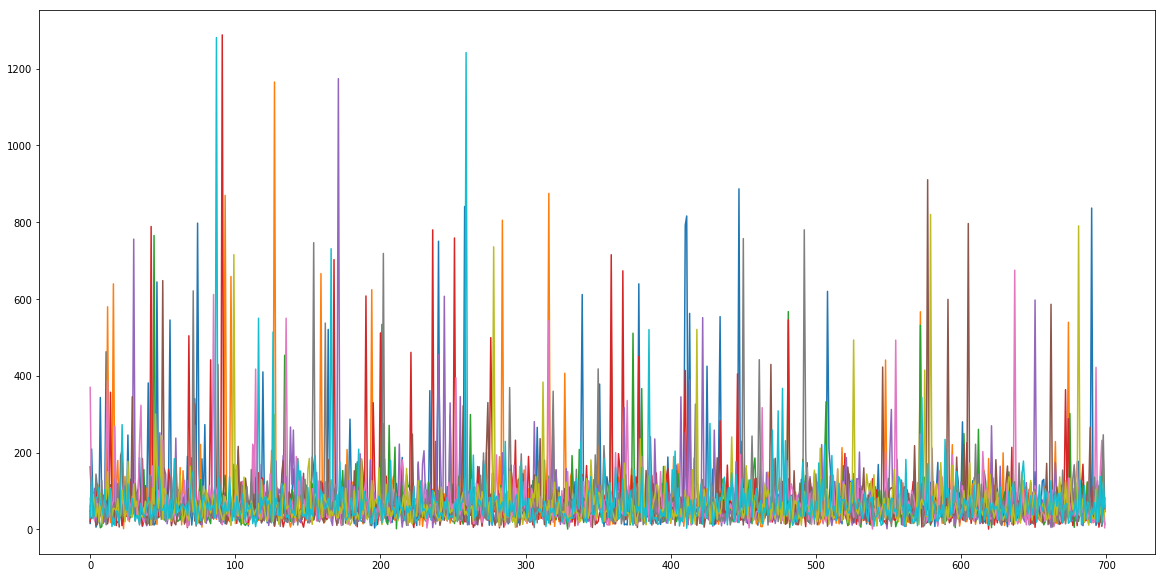

In [46]:
plt.plot(X_train)

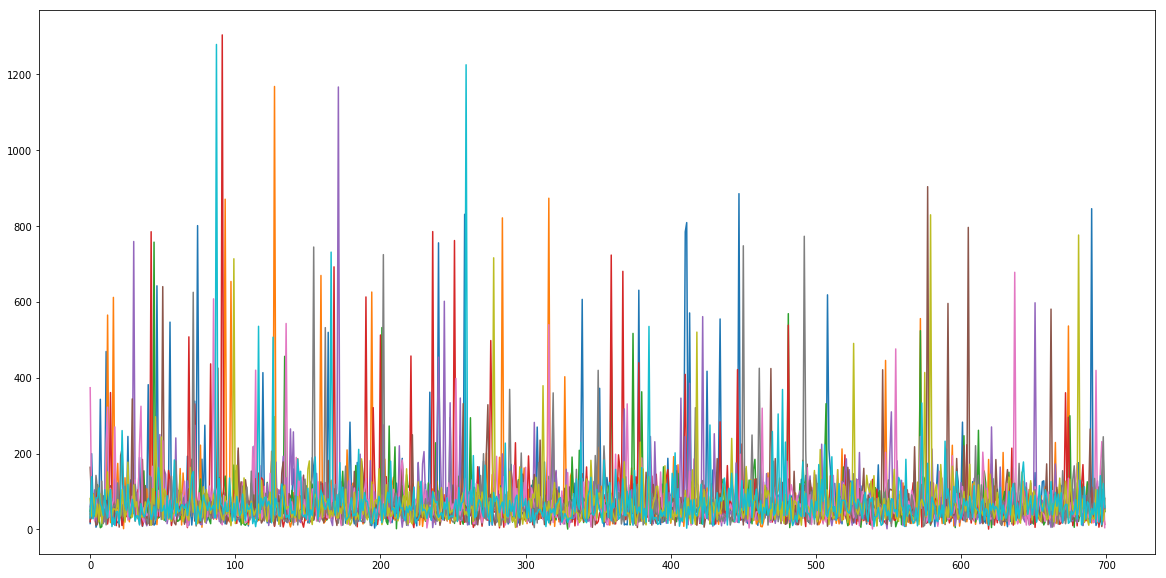

In [47]:
plt.plot(T_train)

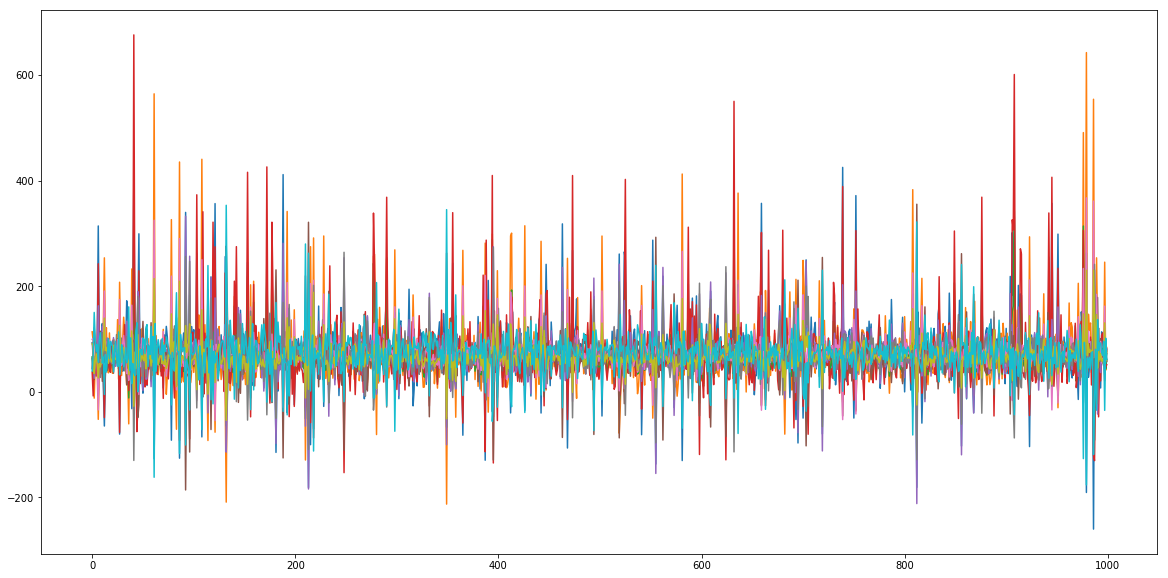

In [48]:
plt.plot(Y)

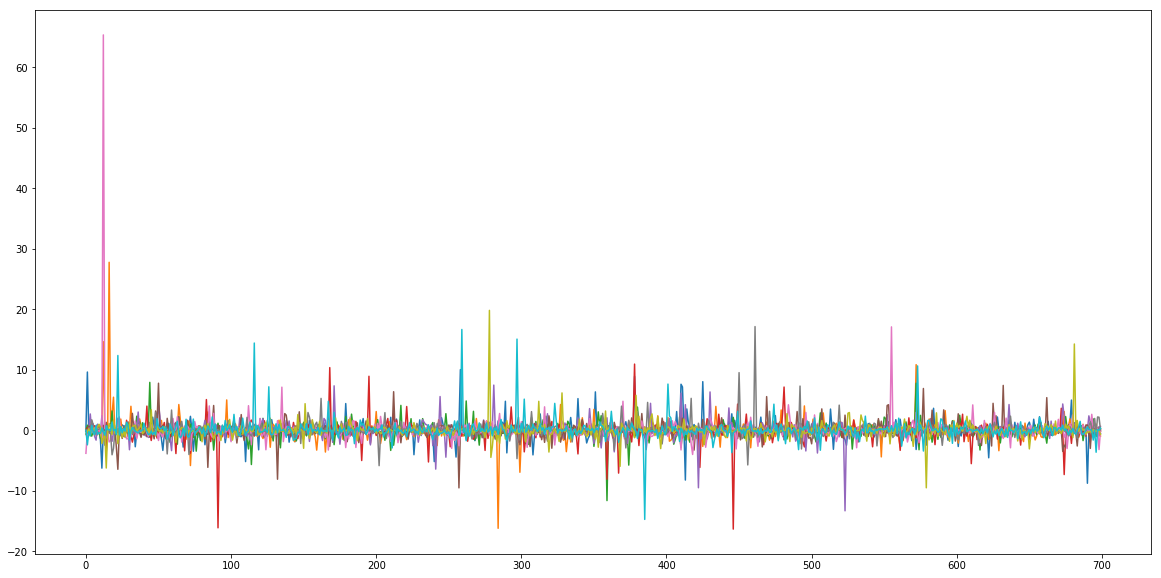

In [49]:
err = nnet._errorf(X_train,T_train)
plt.plot(err)

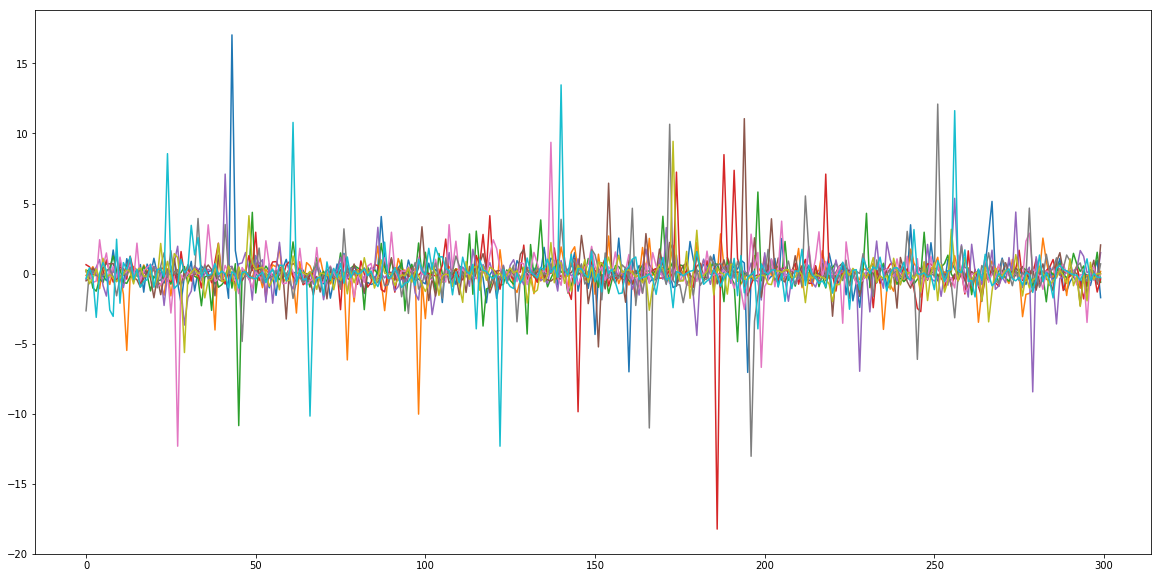

In [50]:
err_t = nnet._errorf(X_test,T_test)
plt.plot(err_t)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


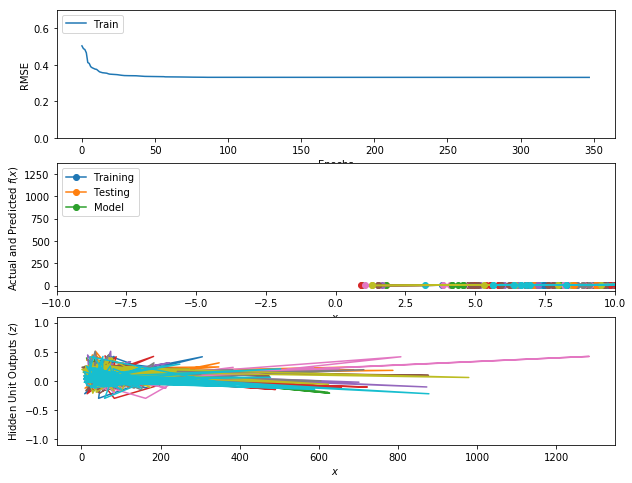

In [51]:
epochs = 10


nn = NeuralNet([10,3,10])
nn.train(X_train, T_train, ftracep=True) 
Y_test, Z = nn.use(X_test, retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(X_train,T_train,'o-',X_test,T_test,'o-',X_test,T_test,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(X_test, Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

In [52]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

datf = df.sample(10000)

nnet = NeuralNet([10,3,10])

X = datf.loc[:,'open'].values.reshape(1000,10)
X.shape
T = datf.loc[:,'close'].values.reshape(1000,10)
T.shape
print('Shape of X : ',X.shape,'     ','Shape of T : ',T.shape)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.1,random_state=42)

print(X.shape,T.shape,X_train.shape,T_train.shape,X_test.shape,T_test.shape)

Shape of X :  (1000, 10)       Shape of T :  (1000, 10)
(1000, 10) (1000, 10) (900, 10) (900, 10) (100, 10) (100, 10)


In [53]:
Y = nnet.use(T)

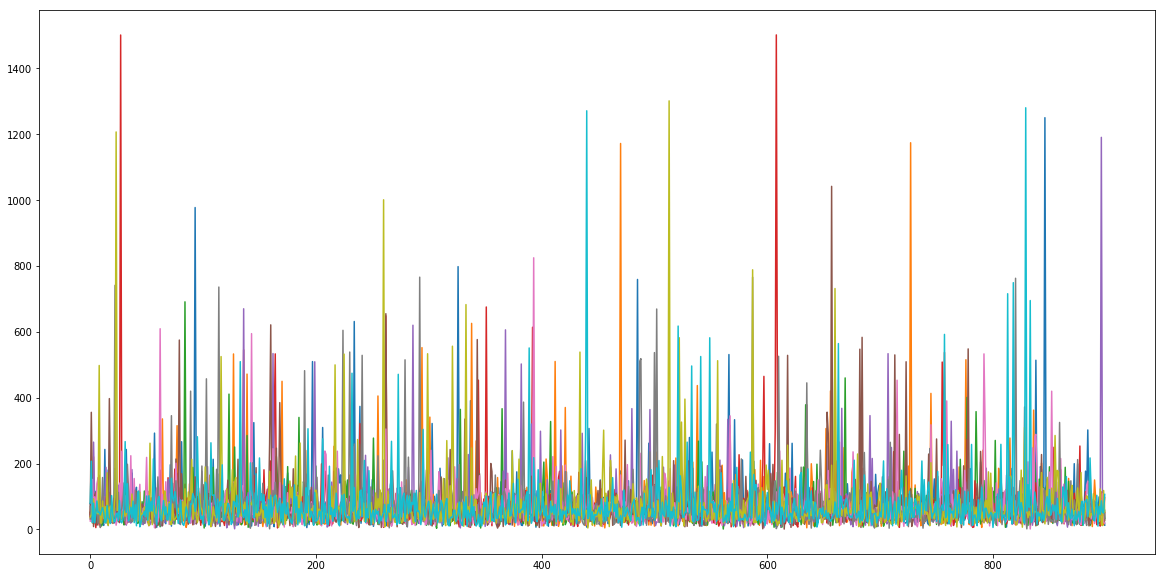

In [54]:
plt.plot(X_train)

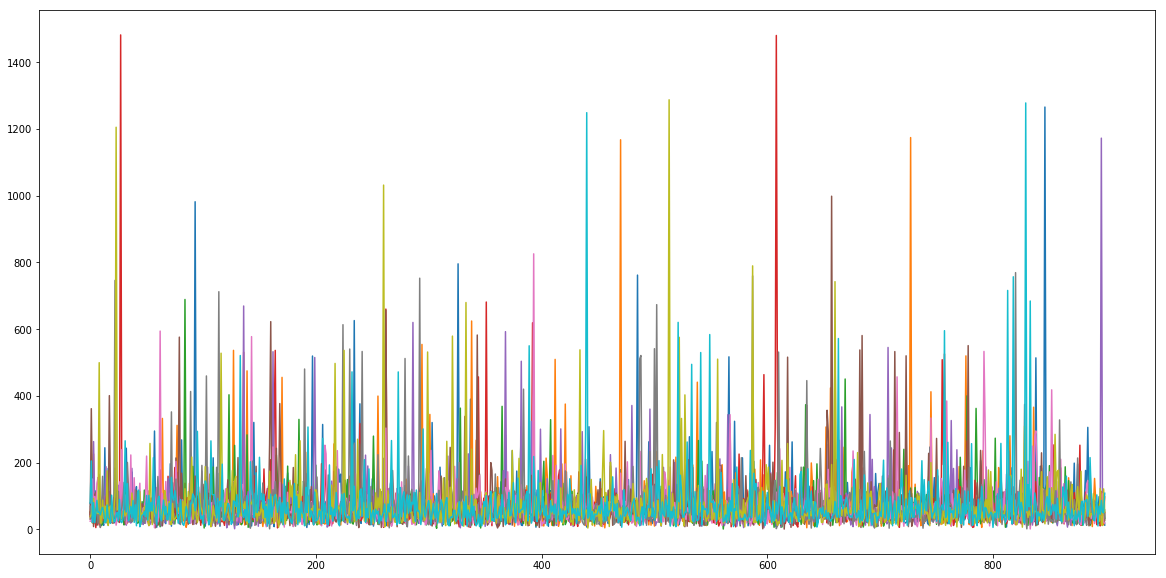

In [55]:
plt.plot(T_train)

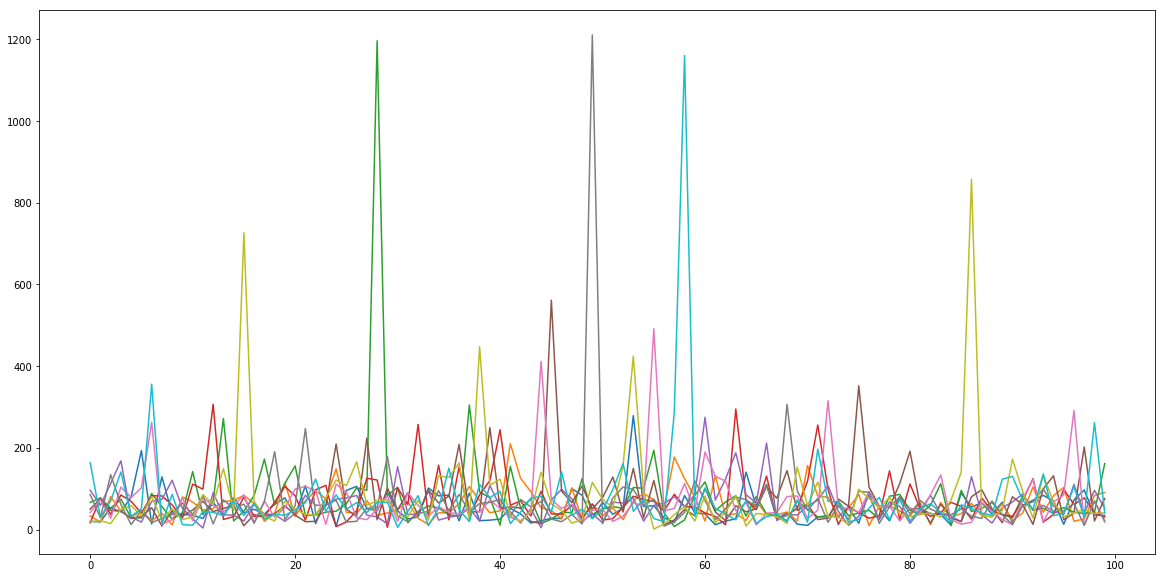

In [56]:
plt.plot(X_test)

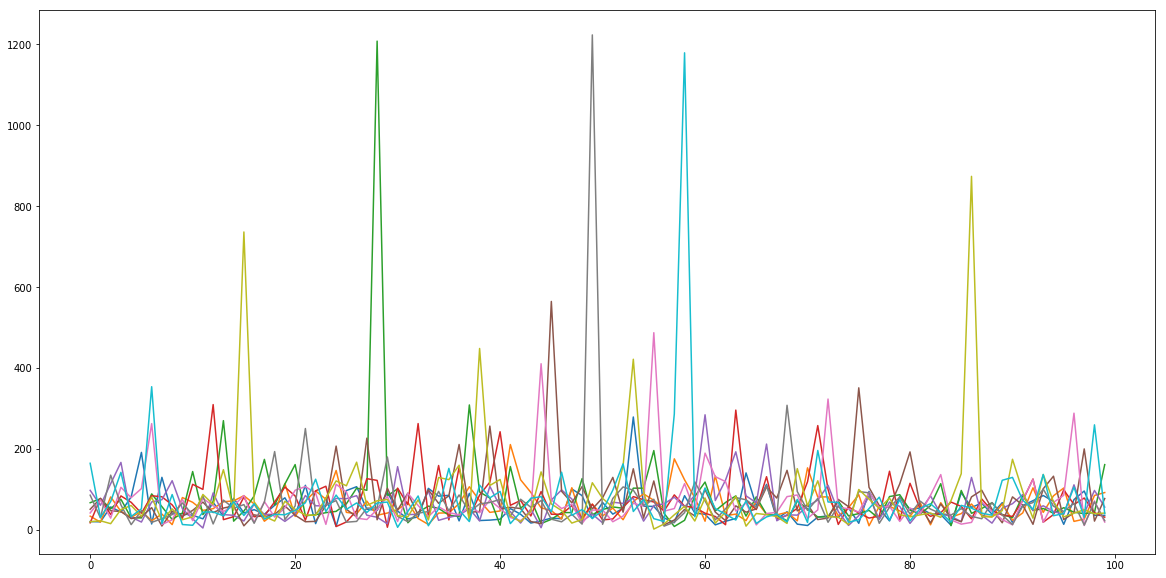

In [57]:
plt.plot(T_test)

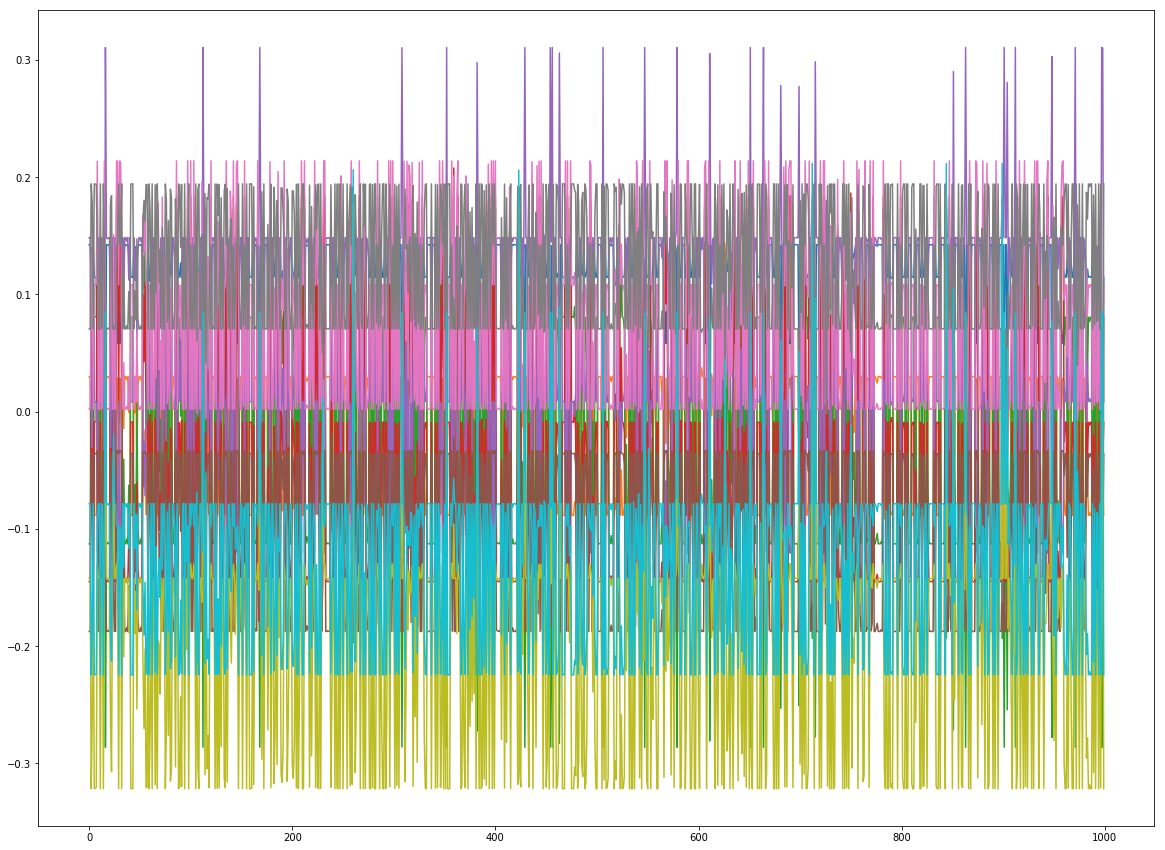

In [58]:
plt.rcParams['figure.figsize'] = (20.0,15.0)
plt.plot(Y)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


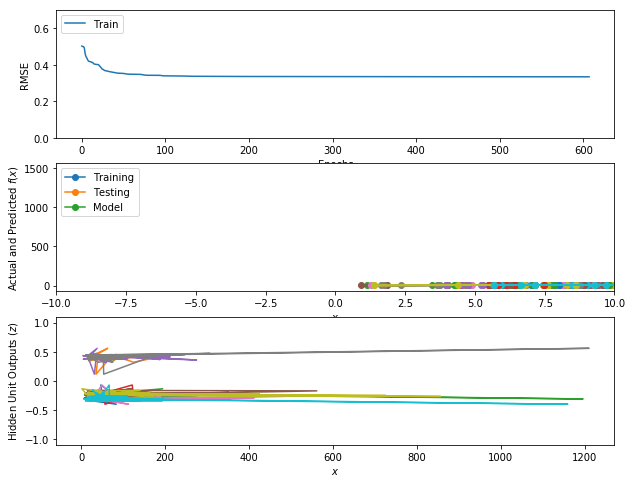

In [59]:
epochs = 20


nn = NeuralNet([10,3,3,10])
nn.train(X_train, T_train, ftracep=True) 
Y_test, Z = nn.use(X_test, retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(X_train,T_train,'o-',X_test,T_test,'o-',X_test,T_test,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(X_test, Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

### Taking the cross-validation from the reading assignment:

In [60]:
# TODO: try to implement your own K-fold CV.  
#      (This will be a part of next assignment (no solution will be provided.))

def kfold_cross_validation(datf,folds):
    datf_split = list()
    datf_copy = list(df)
    each_fold_size = int(len(datf)/folds)
    for i in range (folds):
        fold = list()
        while len(fold) < each_fold_size:
            idx = np.random.randint(len(datf_copy))
            fold.append(datf_copy.pop(idx))
        datf_split.append(fold)
    return datf_split
        
np.random.seed(1)
#sample values of networks
nr = [[10,3,10], [24,12,24], [1,3,3], [2,5,5,2],[8,8,8]]
folds = kfold_cross_validation(nr,5)
print(folds)

[['high'], ['close'], ['volume'], ['date'], ['open']]


### Writing the K Fold cross validation function for using on our dataset:

In [61]:
import sklearn
from sklearn.cross_validation import KFold
def kfold_cross_validation(data,t,folds,neuron_array):
    nl_fold = folds
    res=[]
    best_neurons = []
    testErrs=[]
    result_index = 0 ;
    if len(data)/nl_fold >= 1 and len(t)/nl_fold >= 1:
        kf = KFold(n_folds = folds,n=len(data))
        for train,test in kf:
            train_data = np.array(data)[train]
            test_data = np.array(data)[test]
            train_label = np.array(t)[train]
            test_label = np.array(t)[test]
            for neurons in neuron_array:
                nonlinreg = NeuralNet([data.shape[1],neurons,2])
                nonlinreg.train(train_data,train_label)
                out = nonlinreg.use(test_data)
                err = nonlinreg._errorf(X_train,T_train)
                res.append(err)
            maximum_error = max(res)
            index_min = res.index(maximum_error)
            new_neuron = neuron_array[minIndex]
            nlr = NeuralNet([data.shape[1],bneuron,2])
            nlr.train(train_data,train_label)
            c,p,ps = nlr.use(test_data)
            testErrs.append([new_neuron,nlr._errorf(c,test_label),(train[0],train[-1]),(test[0],test[-1])])
            best_neurons= []
            best_accuracy=[]
            res=[]
    return testErrs

def cross_val_metrics(metrics):
    print("Best Neurons " , "Accuracy ", "Train range ", "Test Range ")
    for i in range(len(metrics)):
        print(metrics[i])

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Explanation of cross validation code

- We implement a function that will perform cross validation for us by finding out the best number of neurons for the hidden layer assuming there is 1 hidden layer and 1 output layer.
- It splits the data into k-1 train sets and 1 test set based on number of folds input using the kfold splitter in sklearn.
- For every train,test combination obtained from Kfold splitter object, we iterate over every possible neuron provided as the input parameter and train the structure with the train data , run it with the test data and obtain the regression. We then compare this regression to obtain accuracy and we store that accuracy in res array. We append the neuron in the best_neurons array. Once every input neuron is iterated over, we find the best accuracy from the res array and find the corresponding number of neurons from the best_neuron array. We store this in bneuron array.
- We then create a structure with the new_neuron and retrain the model with it and use the model on the test partition.
- The function then calculates the accuracy obtained for the test split and appends it with the new_neuron as tuple in the testErrs array.
- Once all iterations are complete, this array is returned by the function and can be used to find the best number of neurons in the hidden layer while training with some other data.

# IV - Results

- Presents the results of comparison of the tested models. <br>
The results of respective models have been presented below each model.
- Visualize the results <br>
Visualization is also done with respective models.
- Discuss about the choice of parameters for each model <br>
A regular network with normal depth can give a good result whereas a very wide or very deep network might overfit or underfit the data.
- What do you think about the results? 

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 
- Cross validation was the biggest challenge and I could not well perform and validate the data.
- Learned a lot about the functions of neural networks such as backward and forward propogation and non linear model too.
- Got to know the tradeoffs between the results of the neural networks.

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Finish the following nonlinear logistic regression class and apply to your classification data. 
- Use cross validation to discover the best model. 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
data = pd.read_csv('creddef-Copy1.csv')
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                    0.0        0.0        0.0       0.0   
1             ...                 3272.0     3455.0     3261.0       0.0   
2             ...                14331.0    14948.0    15549.0    1518.0   
3             ...                28314.0    28959.0    29547.0    2000.0   
4             ...                20940.0    19146.0    19131.0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     689.0       0.0       0.0       0.0       0.0   
1    1000.0    1000.0    1000.0       0.0    2000.0   
2    1500.0    1000.0    1000.0    1000.0    5000.0   
3    2019.0    1200.0    1100.0    1069.0    1000.0   
4   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [64]:
data["MARRIAGE"]= data["MARRIAGE"].replace(0, 3)
data["EDUCATION"]= data["EDUCATION"].replace(6, 5)
data["EDUCATION"]= data["EDUCATION"].replace(0, 5)

In [65]:
data = data.rename(columns={'default.payment.next.month': 'default_pay', 'PAY_0': 'PAY_1'})

In [66]:


class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        #self.stdX = Standardizer()
        NeuralNet.__init__(self,nunits) ;
        
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        numerator = np.exp(z)
        denominator = np.sum(numerator, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(numerator)
        return numerator/denominator
    
    def get_accuracy(self,T1,Y1):
        return 100 - np.mean(np.abs(T1 - Y1)) * 100
        

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t,z = NeuralNet.forward(self,X)
        return self.softmax(t),z
    
    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        Y = np.clip(Y,1e-12, 1. - 1e-12)
        error = -np.sum(np.sum(T*np.log(Y+1e-9)))
        return error
        

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        enc_array = np.array([0,1])
        rows = T.shape[0]
        enc_T = (T[:,None]==enc_array).astype(int)
        if len(T.shape) > 1:
            enc_T1= enc_T.reshape(rows,T.shape[1]+1)
        else:
            enc_T1=enc_T.reshape(rows,2)
        NeuralNet.train(self,X,enc_T1)
        

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        classes, proba = self.forward(Xs)
        if self.stdT is None:
            classes = self.stdT.unstandardize(classes)
        return np.argmax(classes,1),proba,classes


In [67]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)
Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  
means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xtrains = (Xtrain - means) / stds
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)
Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1
Xcv = np.vstack((Xtrain,Xtest))
Tcv = np.vstack((Ttrain,Ttest))

logitnet = NeuralNetLogReg([2,4,2])

In [68]:
for epoch in range(5):
    logitnet.train(Xtrain,Ttrain)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [69]:
classes,preprobs,probs = logitnet.use(Xtest)
print(logitnet.get_accuracy(classes,Ttest))

50.0


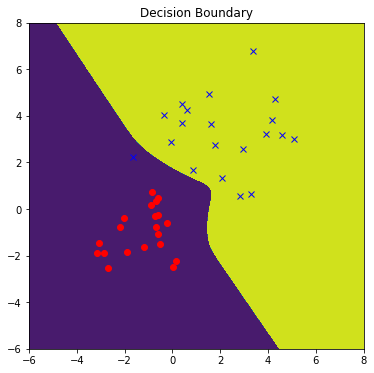

In [70]:
x = np.linspace(-6, 8, 1000)
y = np.linspace(-6, 8, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))

zs,preprobs,probs = logitnet.use(X)


plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.show()

In [71]:
x_data = data.loc[data["default_pay"]==1]
y_data = data.loc[data["default_pay"]==0]
X = pd.concat([x_data.loc[:6500,:],y_data.loc[:6500,:]])
T = X['default_pay']
X = X.drop('default_pay',axis=1)
Xtrain = pd.concat([x_data.loc[:3000,:],y_data.loc[:3000,:]])
Xtrain = Xtrain.drop('default_pay',axis=1)
Ttrain = pd.concat([x_data.loc[:3000,'default_pay'],y_data.loc[:3000,'default_pay']])
Xtest = pd.concat([x_data.loc[3000:6500,:],y_data.loc[3000:6500,:]])
Ttest = pd.concat([x_data.loc[3000:6500,'default_pay'],y_data.loc[3000:6500,'default_pay']])
Xtest = Xtest.drop('default_pay',axis=1)

In [72]:
logitnet = NeuralNetLogReg([24,12,2])
for epoch in range(10):
    logitnet.train(Xtrain,Ttrain)
classes,pre,probs = logitnet.use(Xtest)

acc_logitnn = logitnet.get_accuracy(classes,Ttest)
print(acc_logitnn)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


71.43673236218223


In [73]:
logitnet = NeuralNetLogReg([24,12,2])
for epoch in range(15):
    logitnet.train(Xtrain,Ttrain)
classes,pre,probs = logitnet.use(Xtest)

acc_logitnn = logitnet.get_accuracy(classes,Ttest)
print(acc_logitnn)

77.52070836903741


In [74]:
logitnet = NeuralNetLogReg([24,12,2])
for epoch in range(20):
    logitnet.train(Xtrain,Ttrain)
classes,pre,probs = logitnet.use(Xtest)

acc_logitnn = logitnet.get_accuracy(classes,Ttest)
print(acc_logitnn)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


76.80662667809197


In [75]:
import sklearn
from sklearn.cross_validation import KFold
def kfold_cross_validation(data,t,folds,neuron_array):
    fold = folds
    res=[]
    best_neurons = []
    testErrs=[]
    result_index = 0 ;
    if len(data)/fold >= 1 and len(t)/fold >= 1:
        kf = KFold(n_folds = fold,n=len(data))
        for train,test in kf:
            train_data = np.array(data)[train]
            test_data = np.array(data)[test]
            train_label = np.array(t)[train]
            test_label = np.array(t)[test]
            for neurons in neuron_array:
                logitnet = NeuralNetLogReg([data.shape[1],neurons,2])
                logitnet.train(train_data,train_label)
                proba,preprob,classes = logitnet.use(test_data)
                accuracy = logitnet.get_accuracy(classes,test_label)
                res.append(accuracy)
            best_accuracy = max(res)
            index_min = res.index(best_accuracy)
            new_neurons = neuron_array[index_min]
            logits = NeuralNetLogReg([data.shape[1],new_neurons,2])
            logits.train(train_data,train_label)
            pb,ppb,cls = logits.use(test_data)
            testErrs.append([new_neurons,logits.get_accuracy(cls,test_label),(train[0],train[-1]),(test[0],test[-1])])
            best_neurons= []
            best_accuracy=[]
            res=[]
    return testErrs

def cross_val_metrics(metrics):
    print("Best Neurons " , "Accuracy ", "Train range ", "Test Range ")
    for i in range(len(metrics)):
        print(metrics[i])

In [76]:
metrics_initial = kfold_cross_validation(Xcv,Tcv,folds=5,neuron_array=[2,4,6,8,10])

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [77]:
cross_val_metrics(metrics_initial)

Best Neurons  Accuracy  Train range  Test Range 
[2, 50.0, (28, 139), (0, 27)]
[2, 50.0, (0, 139), (28, 55)]
[2, 50.0, (0, 139), (56, 83)]
[2, 50.0, (0, 139), (84, 111)]
[2, 50.0, (0, 111), (112, 139)]


In [78]:
cross_val_metrics(metrics_initial)

Best Neurons  Accuracy  Train range  Test Range 
[2, 50.0, (28, 139), (0, 27)]
[2, 50.0, (0, 139), (28, 55)]
[2, 50.0, (0, 139), (56, 83)]
[2, 50.0, (0, 139), (84, 111)]
[2, 50.0, (0, 111), (112, 139)]


In [79]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)
Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  
means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xtrains = (Xtrain - means) / stds
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)
Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1
Xvalidate = np.vstack((Xtrain,Xtest))
Tvalidate = np.vstack((Ttrain,Ttest))

logitnet = NeuralNetLogReg([3,4,4,3])

In [81]:
prelim_metrics = kfold_cross_validation(Xvalidate,Tvalidate,folds=5,neuron_array=[2,4,6,8,10])
cross_val_metrics(prelim_metrics)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


Best Neurons  Accuracy  Train range  Test Range 
[2, 49.999999999999986, (28, 139), (0, 27)]
[2, 50.0, (0, 139), (28, 55)]
[2, 50.0, (0, 139), (56, 83)]
[2, 50.0, (0, 139), (84, 111)]
[2, 50.0, (0, 111), (112, 139)]


In [82]:
x_data = data.loc[data["default_pay"]==1]
y_data = data.loc[data["default_pay"]==0]
X = pd.concat([x_data.loc[:6500,:],y_data.loc[:6500,:]])
T = X['default_pay']
X = X.drop('default_pay',axis=1)
Xtrain = pd.concat([x_data.loc[:3000,:],y_data.loc[:3000,:]])
Xtrain = Xtrain.drop('default_pay',axis=1)
Ttrain = pd.concat([x_data.loc[:3000,'default_pay'],y_data.loc[:3000,'default_pay']])
Xtest = pd.concat([x_data.loc[3000:6500,:],y_data.loc[3000:6500,:]])
Ttest = pd.concat([x_data.loc[3000:6500,'default_pay'],y_data.loc[3000:6500,'default_pay']])
Xtest = Xtest.drop('default_pay',axis=1)
Xtest = pd.concat([x_data.loc[3000:6500,:],y_data.loc[3000:6500,:]])
Ttest = pd.concat([x_data.loc[3000:6500,'default_pay'],y_data.loc[3000:6500,'default_pay']])
Xtest = Xtest.drop('default_pay',axis=1)

In [83]:
net = NeuralNetLogReg([24,12,2])
for epoch in range(10):
    net.train(Xtrain,Ttrain)
classes,pre,probs = net.use(Xtest)
nnlogreg_acc = net.get_accuracy(classes,Ttest)
print(nnlogreg_acc)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


77.43501856612397


In [84]:
metrics = kfold_cross_validation(Xvalidate,Tvalidate,folds=5,neuron_array=[4,6,8,20,30,36])
cross_val_metrics(metrics)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


Best Neurons  Accuracy  Train range  Test Range 
[4, 50.0, (28, 139), (0, 27)]
[4, 50.0, (0, 139), (28, 55)]
[4, 50.0, (0, 139), (56, 83)]
[4, 50.0, (0, 139), (84, 111)]
[4, 50.0, (0, 111), (112, 139)]


# Deep Learning (2 Extra Credits)


For A5 extra credits, you build a deep network with more than 5 layers using TensorFlow. 
Main task for this work is converting your neural network codes with TensorFlow and searching for good structures that works well for your data. 
This includes following tasks.

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 
- Results
  - Presents the results of applications of your deep networks.
  - Visualize the results 
  - Discuss about the choice of network structures and performance of it as you change the structures.  
  - What do you think about the results? 


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nn import NeuralNet
import sklearn

In [86]:
dframe = pd.read_csv('creddef-Copy1.csv')
dframe.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               30000.000000   30000.000000   
mean              ...               43262.948967   40311.400967   
std               ...               64332.856134   60797.155770   
min               ...             -170000.000000  -81334.000000   
25%               ...                2326.750000    1763.000000   
50%               ...               19052.000000   18104.500000   
75%               ...               54506.000000   50190.500000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count   30000.000000   30000.000000  3.000000e+04   30000.00000   
mean    38871.760400    5663.580500  5.921163e+03    5225.68150   
std     59554.107537   16563.280354  2.304087e+04   17606.96147   
min   -339603.000000       0.000000  0.000000e+00       0.00000   
25%      1256.000000    1000.000000  8.330000e+02     390.00000   
50%     17071.000000    2100.000000  2.009000e+03    1800.00000   
75%     49198.250000    5006.000000  5.000000e+03    4505.00000   
max    961664.000000  873552.000000  1.684259e+06  896040.00000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default.payment.next.month  
count   30000.000000   30000.000000   30000.000000                30000.000000  
mean     4826.076867    4799.387633    5215.502567                    0.221200  
std     15666.159744   15278.305679   17777.465775                    0.415062  
min         0.000000       0.000000       0.000000                    0.000000  
25%       296.000000     252.500000     117.750000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4013.250000    4031.500000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 25 columns]

In [87]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
import keras
from keras import models,layers,losses,optimizers,metrics
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [88]:
dframe = dframe.rename(columns={'default.payment.next.month': 'default_pay', 'PAY_0': 'PAY_1'})

In [89]:
def plot_metrics(result_hist):
    plt.title('Validation Accuracy')
    plt.plot(range(len(result_hist['val_acc'])), result_hist['val_acc'])
    plt.show()
    plt.title('Validation Loss')
    plt.plot(range(len(result_hist['val_loss'])),result_hist['val_loss'])
    plt.show()
    plt.title('Train Accuracy')
    plt.plot(range(len(result_hist['acc'])),result_hist['acc'])
    plt.show()
    plt.title('Loss')
    plt.plot(range(len(result_hist['loss'])),result_hist['loss'])
    plt.show()

In [90]:
min_max_scaler = MinMaxScaler()
T = dframe["default_pay"]
X = dframe.drop('default_pay',axis=1)
standardized_dataset = min_max_scaler.fit_transform(X)

In [91]:
Xtrain, Xtest, ytrain, ytest = train_test_split(standardized_dataset, T, test_size=0.3 ,random_state=1)

In [92]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(x,y,z):
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter3D(xs=x, ys=y, zs=z)
    plt.show()

Following are the deep learning networks I have implemented. In all those networks, loss function is binary crossentropy since this classification problem is binary classification. I have done experiments with following deep networks : <br>
- (3,4,4,4,2) Is a 5-layer network, which means that the hidden layers will have more units than the input and output layer.
- (48,36,24,18,12,6,3,2) Is a 8-layer network, which has decreasing neurons from input to output.
- (5,4,3,2,1,2,3,4,5) Is a 9-layer network, which is a like a pallindrome where input and output has same neurons and gradually decrease towards the centrel hidden layer which has just one unit.

### Model 1

- Following network has been constructed with 5 layer and the input layer and output layer has lesser number of neurons than the hidden layers.
- This model could show us how the input gets distributed and how it converges when hidden layers are more taller than the input and output layer.
- Having lesser number of neurons in input than the data inputs will force the network to extract the features from the data and squeeze it into lesser number of neurons.
- We watch how the graph is with accuracy and loss as those are the most important metrics for a network.

In [103]:
model = keras.models.Sequential()
model_1 = [3,4,4,4,2]
for layer in model_1:
    model.add(layers.Dense(input_dim=Xtrain.shape[1],units=layer,activation='tanh'))
model.add(layers.Dense(units=1,activation='tanh'))
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

- No. of layers = 5
- Type : Sequential
- Activations used : Tanh
- Optimizer : sgd (Stochastic Gradient Descent)
- Loss function : Binary crossentropy
- Metrics of measurement : Accuracy
- Epochs = 10
<br><br> 
#### Steps in the model :
- First we have split the data into train and test with 70-30 ratio.
- We initialize the model with 5 layers and number of neurons in each layer.
- For every layer in the network, input dimensions and activation functions are specified using a loop.
- A single unit is used as the final output is a single value of target and hence expects a single neuron.
- Adam optimizer is used with no learning rate specified.
- The network is compiled with a loss function and measurement metrics.

Train on 21000 samples, validate on 9000 samples
Epoch 1/10
21000/21000 [==============================] - 5s 258us/step - loss: 0.5265 - acc: 0.7792 - val_loss: 0.5289 - val_acc: 0.7778
Epoch 2/10
21000/21000 [==============================] - 5s 217us/step - loss: 0.5230 - acc: 0.7792 - val_loss: 0.5225 - val_acc: 0.7778
Epoch 3/10
21000/21000 [==============================] - 5s 226us/step - loss: 0.5175 - acc: 0.7792 - val_loss: 0.5158 - val_acc: 0.7778
Epoch 4/10
21000/21000 [==============================] - 5s 221us/step - loss: 0.5094 - acc: 0.7792 - val_loss: 0.5060 - val_acc: 0.7778
Epoch 5/10
21000/21000 [==============================] - 5s 216us/step - loss: 0.5022 - acc: 0.7795 - val_loss: 0.4996 - val_acc: 0.7793
Epoch 6/10
21000/21000 [==============================] - 5s 224us/step - loss: 0.4937 - acc: 0.7813 - val_loss: 0.4965 - val_acc: 0.7799
Epoch 7/10
21000/21000 [==============================] - 5s 217us/step - loss: 0.4867 - acc: 0.7842 - val_loss: 0.4828 - v

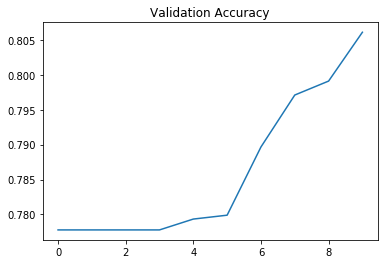

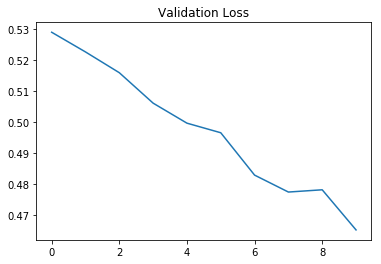

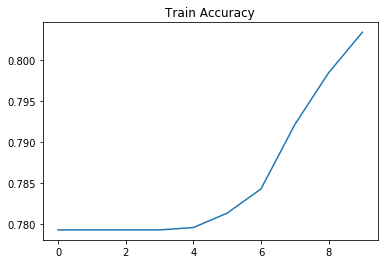

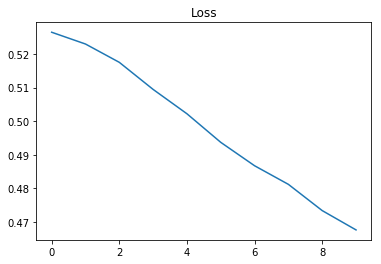

In [104]:
results = model.fit(Xtrain,ytrain,epochs = 10,validation_data=[Xtest,ytest],verbose=1)
plot_metrics(results.history)

- As we can see, validation accuracy increases a great deal after the 5th and 6th epoch.
- Validation loss is almost linearly decreasing which is an indication that the model is actually good.
- Train accuracy is increasing slowly till the 4th epoch and then it is increasing fast. This can be an indication that the feature extraction is working good.
- Loss is decreasing almost linearly which is again a very good sign and again, this model is actually a good network.

### Model 2

- Following network has been constructed with 8 layer and the units are in decreasing order from the input layer to the output layer.
- This model could show us how the features are extracted from layers to layers as the units decrease, feature extraction becomes stronger. As the input layer has 48 neurons and the output has just 2, the hidden units have the crucial task of extracting the features from 48 units to fit and map to those 2 output neurons.
- As the units in all the layers, are decreasing with a ratio. feature extraction will be better with a rational decrease. Also, the data could underfit or overfit with the data.
- We watch how the graph is with accuracy and loss as those are the most important metrics for a network.

In [98]:
Xtrain, Xtest, ytrain, ytest = train_test_split(standardized_dataset, T, test_size=0.3 ,random_state=1)
model_2 = [48,36,24,18,12,6,3,2]
model2 = keras.models.Sequential()
for layer_2 in model_2:
    model2.add(layers.Dense(input_dim=Xtrain.shape[1],units=layer_2,activation='relu'))
model2.add(layers.Dense(units=1,activation='sigmoid'))
grad_desc = optimizers.adam(lr=0.003)
model2.compile(grad_desc,loss='binary_crossentropy',metrics=['accuracy'])

- No. of layers = 8
- Type : Sequential
- Activations used : ReLU (Rectified Linear Unit) and Sigmoid
- Optimizer : adam
- Loss function : Binary crossentropy
- Metrics of measurement : Accuracy
- Epochs = 10
<br><br> 
#### Steps in the model :
- First we have split the data into train and test with 70-30 ratio.
- We initialize the model with 8 layers and number of neurons in each layer.
- For every layer in the network, input dimensions and activation functions are specified using a loop.
- A single unit is used as the final output is a single value of target and hence expects a single neuron.
- Adam optimizer is used with a learning rate of 0.003
- The network is compiled with a loss function and measurement metrics.

In [99]:

results2 = model2.fit(Xtrain,ytrain,epochs = 10,validation_data=[Xtest,ytest],verbose=1)


Train on 21000 samples, validate on 9000 samples
Epoch 1/10
21000/21000 [==============================] - 7s 352us/step - loss: 0.4756 - acc: 0.7955 - val_loss: 0.4600 - val_acc: 0.8102
Epoch 2/10
21000/21000 [==============================] - 7s 320us/step - loss: 0.4544 - acc: 0.8129 - val_loss: 0.4558 - val_acc: 0.8152
Epoch 3/10
21000/21000 [==============================] - 7s 313us/step - loss: 0.4483 - acc: 0.8153 - val_loss: 0.4500 - val_acc: 0.8126
Epoch 4/10
21000/21000 [==============================] - 7s 311us/step - loss: 0.4455 - acc: 0.8174 - val_loss: 0.4433 - val_acc: 0.8189
Epoch 5/10
21000/21000 [==============================] - 7s 313us/step - loss: 0.4411 - acc: 0.8189 - val_loss: 0.4443 - val_acc: 0.8162
Epoch 6/10
21000/21000 [==============================] - 7s 315us/step - loss: 0.4413 - acc: 0.8190 - val_loss: 0.4452 - val_acc: 0.8173
Epoch 7/10
21000/21000 [==============================] - 7s 344us/step - loss: 0.4390 - acc: 0.8201 - val_loss: 0.4455 - v

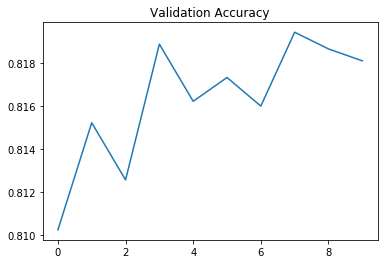

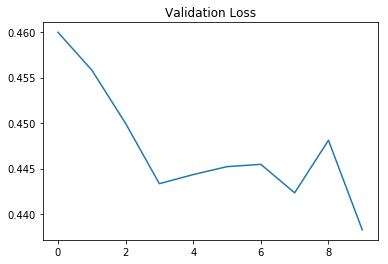

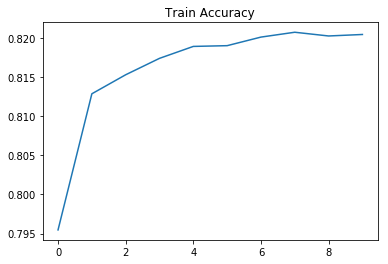

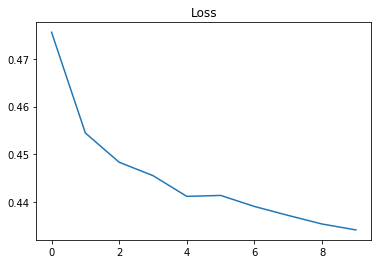

In [100]:
plot_metrics(results2.history)

- As we can see, validation accuracy is very spiking every epoch. This could mean that this model is not fitting well with the data. But contradictorily, this network has a produced a good accuracy despite of the fluctuations in the accuracy.
- Validation loss is decreasing very fast till the 3rd epoch and then increasing again and then spiking at 7th and 8th epoch. Loss is quite reduced over the 10 epochs.
- Train accuracy is increasing very fast in the first 2 epochs and then slowly increasing till it achieves a good overall maximum value.
- Loss curve is a decreasing at a very good rate which is a sign of very good network and then achieves a great minimum loss.

### Model 3

- Following network has been constructed with 9 layers and the units are in pallindrome order from the input layer to the output layer.
- The purpose of this network architecture is to actually see how the feature extraction contracts till a single neuron and then again expands to maximum units in this network. I wanted to see how it makes the difference when features are first tightly contracted and then again expanded. 
- As the units in all the layers are in pallindrome order there is a possibility that the network will not imporve accuracy at all. Also, the data could underfit or overfit with the data.
- We watch how the graph is with accuracy and loss as those are the most important metrics for a network.

In [119]:
Xtrain, Xtest, ytrain, ytest = train_test_split(standardized_dataset, T, test_size=0.3 ,random_state=1)
model_3 = [5,4,3,2,1,2,3,4,5]
model3 = keras.models.Sequential()
for layer_3 in model_3:
    model3.add(layers.Dense(input_dim=Xtrain.shape[1],units=layer_3,activation='tanh'))
model3.add(layers.Dense(units=1,activation='relu'))
grad_desc = optimizers.adam(lr=0.000003)
model3.compile(grad_desc,loss='binary_crossentropy',metrics=['accuracy'])

- No. of layers = 9
- Type : Sequential
- Activations used : Tanh (Hyperbolic Tangent) and ReLU (Rectified Linear Unit)
- Optimizer : Adam
- Loss function : Binary crossentropy
- Metrics of measurement : Accuracy
- Epochs = 10
<br><br> 
#### Steps in the model :
- First we have split the data into train and test with 70-30 ratio.
- We initialize the model with 9 layers and number of neurons in each layer.
- For every layer in the network, input dimensions and activation functions are specified using a loop.
- A single unit is used as the final output is a single value of target and hence expects a single neuron.
- Adam optimizer is used with a learning rate of 0.000003
- The network is compiled with a loss function and measurement metrics.

In [120]:
results3 = model3.fit(Xtrain,ytrain,epochs = 10,validation_data=[Xtest,ytest],verbose=1,shuffle=True)

Train on 21000 samples, validate on 9000 samples
Epoch 1/10
21000/21000 [==============================] - 10s 462us/step - loss: 3.2751 - acc: 0.7792 - val_loss: 3.2791 - val_acc: 0.7778
Epoch 2/10
21000/21000 [==============================] - 8s 360us/step - loss: 3.2315 - acc: 0.7792 - val_loss: 3.2481 - val_acc: 0.7778
Epoch 3/10
21000/21000 [==============================] - 8s 361us/step - loss: 3.1752 - acc: 0.7792 - val_loss: 3.1726 - val_acc: 0.7778
Epoch 4/10
21000/21000 [==============================] - 8s 360us/step - loss: 3.0761 - acc: 0.7792 - val_loss: 3.0687 - val_acc: 0.7778
Epoch 5/10
21000/21000 [==============================] - 8s 358us/step - loss: 2.9916 - acc: 0.7792 - val_loss: 3.0238 - val_acc: 0.7778
Epoch 6/10
21000/21000 [==============================] - 8s 361us/step - loss: 2.9586 - acc: 0.7792 - val_loss: 2.9928 - val_acc: 0.7778
Epoch 7/10
21000/21000 [==============================] - 7s 357us/step - loss: 2.9137 - acc: 0.7792 - val_loss: 2.9367 - 

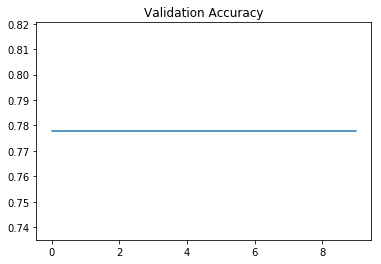

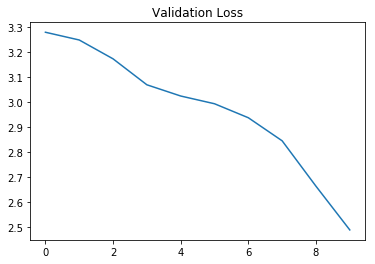

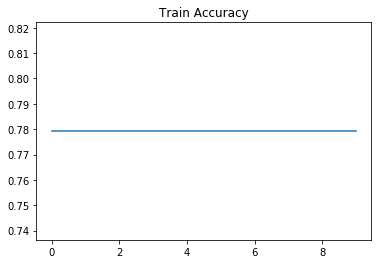

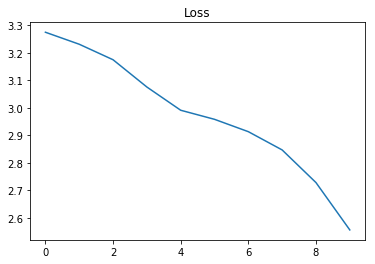

In [124]:
plot_metrics(results3.history)

- As we can see, validation accuracy is a straight line which is bad sign as there is no increase or decrease in accuracy of the network.
- Validation loss is decreasing curve which somewhat an even curve, but has a short increase at the 7th epoch.The loss is decreasing even if the accuracy does not increase.
- Train accuracy is again a straight line which is not a very good sign as it means there is no changes caused by this model for training.
- Loss curve is a decreasing and even curve which points that even if there is no increase in the training accuracy or validation accuracy, the overall loss is increasing.

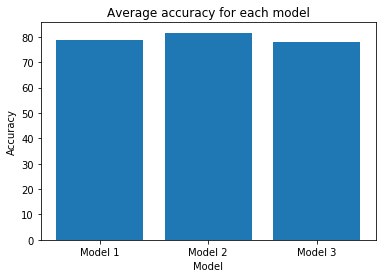

In [132]:
avg_acc_model1 = 100*sum(results.history["acc"])/float(len(results.history["acc"]))
avg_acc_model2 = 100*sum(results2.history["acc"])/float(len(results2.history["acc"]))
avg_acc_model3 = 100*sum(results3.history["acc"])/float(len(results3.history["acc"]))
avg_acc = [avg_acc_model1,avg_acc_model2,avg_acc_model3]
plt.bar( [1,2,3], avg_acc)
plt.xticks([1,2,3],["Model 1","Model 2","Model 3"])
plt.title("Average accuracy for each model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


Taking a look at the accuracies of the model, it is clear that 2nd model with decreasing neurons in each layer produced the most average accuracy and third model produced the least, slightly lesser than the first model.

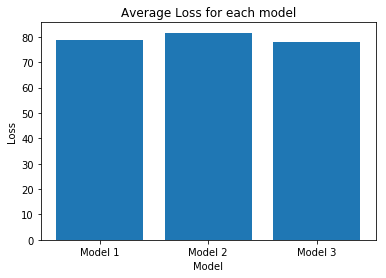

In [129]:
avg_loss_model1 = 100*sum(results.history["loss"])/float(len(results.history["loss"]))
avg_loss_model2 = 100*sum(results2.history["loss"])/float(len(results2.history["loss"]))
avg_loss_model3 = 100*sum(results3.history["loss"])/float(len(results3.history["loss"]))
avg_loss = [avg_acc_model1,avg_acc_model2,avg_acc_model3]
plt.bar( [1,2,3], avg_loss)
plt.xticks([1,2,3],["Model 1","Model 2","Model 3"])
plt.title("Average Loss for each model")
plt.xlabel("Model")
plt.ylabel("Loss")
plt.show()

Taking a look at the accuracies of the model, it is clear that 3rd model with pallindrome neurons produced the least average loss and second model produced the most loss.

There is a tradeoff with the second model as it is producing the highest accuracy but most loss too.

### References :
- https://keras.io/
- Professor's Neural network notebook
- Professor's Deep Learning and ML methodology reading assignments.
- Tensorflow 101 workbook
- https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463
- Stackoverflow
- Previous reading and homework assignments
- Wikipedia

# Conclusions

- I learned in depth about deep learning . I was also able to learn the effect of having different on this type of data.
- I learned about Keras and TensorFlow and how to apply it.
- I learned a lot about Keras and how easy it is to build a model with it considering that the backend of Tensorflow is completely abstracted.
- I learned about the different effects of parameters like learning rate , activation function and optimizer used.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 |10| Summary of Neural Networks
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 10| plots for results
| 15| Discussions about parameter/network structure choice 
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
